#**📊 Proyecto Telecom X — Predicción de Cancelación de Clientes**

##📌 Descripción del Proyecto

El presente proyecto tiene como objetivo anticipar la cancelación de clientes (Churn) en una empresa de telecomunicaciones. Para ello se construirá un pipeline de machine learning robusto que permitirá:

Preparar y transformar los datos para el modelado (limpieza, codificación, normalización y balanceo).

Explorar la correlación y la importancia de las variables en la predicción de cancelación.

Entrenar diferentes modelos de clasificación y evaluar su desempeño con métricas relevantes.

Establecer un modelo campeón que servirá como base para una futura implementación en producción.#

#**⚙️ Importación de Librerías y Configuraciones**

Se emplean librerías ampliamente reconocidas en Ciencia de Datos y Machine Learning:##🛠️ Preparación de los Datos

In [1]:
import numpy as np
import pandas as pd
import joblib
from google.colab import files
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Utilidades
import warnings
from datetime import datetime

# Machine Learning
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
# Descargar modelo
import pickle
# Control de warnings
warnings.filterwarnings("ignore")

# Información de versión
import sklearn
print("📦 Versiones -> Numpy:", np.__version__, "Pandas:", pd.__version__, "Sklearn:", sklearn.__version__)


📦 Versiones -> Numpy: 2.0.2 Pandas: 2.2.2 Sklearn: 1.6.1


##**🎨 Paleta de Colores y Estilo**

In [2]:
# Paleta de colores profesional
PALETA = {
    "base": "#4C72B0",       # Azul neutro para series principales
    "resaltado": "#FF7F0E",  # Naranja para resaltar información
    "gris": "#EAEAF2",       # Fondo y elementos secundarios
    "exito": "#55A868",      # Indicadores positivos
    "alerta": "#C44E52"      # Indicadores negativos o de churn
}

sns.set_palette([PALETA["base"], PALETA["resaltado"]])


AZUL_1, AZUL_2, AZUL_3, AZUL_4 = '#4682b4', '#5a9bd4', '#2e6eab', '#1f4e79'
NARANJA_1, NARANJA_2, NARANJA_3, NARANJA_4 = '#e9611d', '#f07c3e', '#cc4e0f', '#a53d0c'
PURPURA_1, PURPURA_2, PURPURA_3, PURPURA_4 = '#6a3fa0', '#8b5fc4', '#4f2d84', '#381c66'
CREMA_1, CREMA_2, CREMA_3, CREMA_4 = '#ebac3a', '#d99a2e', '#c48824', '#b0771b'
GRIS_1, GRIS_2, GRIS_3, GRIS_4 = '#4d4d4d', '#7a7a7a','#b0b0b0','#dcdcdc'


#**📂 Carga de Datos**

In [3]:
# Cargar archivo CSV previamente tratado en la Parte 1
datos = pd.read_csv('/content/Challenge_TelecomX_2.csv')
datos


,ID_cliente,Churn,Sexo,Jubilado/a,Pareja/Conyugue,Personas_a_cargo,Meses_Contrato_Cliente,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Streaming_TV,Streaming_Peliculas,Tipo_de_Contrato,Pago_online,Forma_de_Pago,Gastos_Mensuales,Gastos_Totales,Cuentas_Diarias,Servicios_Contratados,Total_Servicios
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667,Yes-Yes-DSL,4
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667,No-Yes-DSL,2
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333,No-Yes-Fiber optic,2
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667,Yes-Yes-Fiber optic,5
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667,Yes-Yes-Fiber optic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,One year,No,Mailed check,55.15,742.90,1.838333,No-Yes-DSL,3
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667,No-Yes-Fiber optic,2
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667,No-Yes-DSL,2
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667,No-Yes-DSL,5


In [4]:
# Información general de las columnas
datos.info()

# Preparación inicial de los datos

# Revisión de valores nulos
print("🔎 Valores nulos iniciales:")
print(datos.isnull().sum())

# Tratamiento: Reemplazamos nulos en 'Gastos_Totales' por 0
datos["Gastos_Totales"].fillna(0, inplace=True)

# Confirmamos
print("\n✅ Valores nulos después del tratamiento:")
print(datos.isnull().sum())


# Tipos de datos
print("\n🔎 Tipos de datos:")
print(datos.dtypes)

# Si 'ID_cliente' es solo un identificador, lo dejamos como string
datos["ID_cliente"] = datos["ID_cliente"].astype(str)


# Revisión de duplicados
duplicados = datos.duplicated().sum()
print(f"\n🔎 Registros duplicados: {duplicados}")

if duplicados > 0:
    datos.drop_duplicates(inplace=True)
    print(f"✅ {duplicados} registros duplicados eliminados.")


# Dimensiones del dataset
print("\n📐 Dimensiones del dataset (filas, columnas):")
print(datos.shape)


# Vista general del DataFrame
print("\n👀 Primeras filas del dataset listo para el modelado:")
display(datos.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7043 non-null   object 
 1   Churn                   7043 non-null   object 
 2   Sexo                    7043 non-null   object 
 3   Jubilado/a              7043 non-null   int64  
 4   Pareja/Conyugue         7043 non-null   object 
 5   Personas_a_cargo        7043 non-null   object 
 6   Meses_Contrato_Cliente  7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   object 
 8   Varias_Lineas           7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Backup_Online           7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  Streaming_TV            7043 non-null   

,ID_cliente,Churn,Sexo,Jubilado/a,Pareja/Conyugue,Personas_a_cargo,Meses_Contrato_Cliente,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Streaming_TV,Streaming_Peliculas,Tipo_de_Contrato,Pago_online,Forma_de_Pago,Gastos_Mensuales,Gastos_Totales,Cuentas_Diarias,Servicios_Contratados,Total_Servicios
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,Yes-Yes-DSL,4
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,No-Yes-DSL,2
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,No-Yes-Fiber optic,2
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,Yes-Yes-Fiber optic,5
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,Yes-Yes-Fiber optic,3


#**🧹Eliminación de columnas irrelevantes**

En esta etapa eliminamos aquellas columnas que no aportan valor a los modelos predictivos, como identificadores únicos.
Estas variables no tienen relación con la probabilidad de cancelación y podrían introducir ruido en el modelo.

In [5]:
# Lista de columnas a eliminar (identificadores, claves únicas, etc.)
columnas_eliminar = ["ID_cliente"]

# Eliminamos columnas innecesarias
datos = datos.drop(columns=columnas_eliminar, errors="ignore")

# Confirmamos
print("✅ Columnas eliminadas:", columnas_eliminar)
print("📐 Dimensiones actuales del dataset:", datos.shape)


✅ Columnas eliminadas: ['ID_cliente']
📐 Dimensiones actuales del dataset: (7043, 23)


#**🔍 Análisis Exploratorio de Datos (EDA) — Enfocado en Churn**
Distribución de la variable objetivo

Objetivo: Ver cómo se distribuyen los clientes que cancelaron el servicio (Churn) y los que no

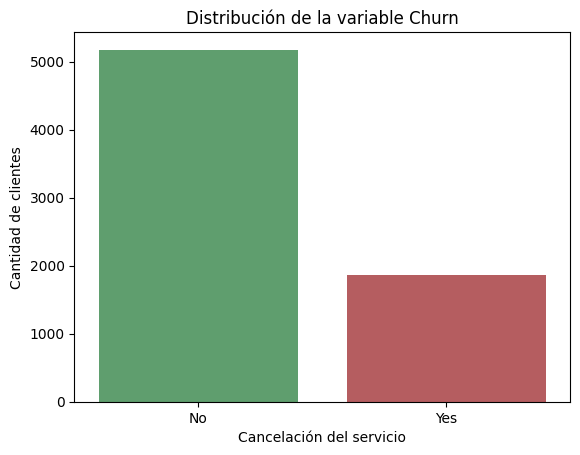

Proporción de Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [6]:
# Distribución de la variable objetivo 'Churn'


# Conteo de churn
sns.countplot(x="Churn", data=datos, palette=[PALETA["exito"], PALETA["alerta"]])
plt.title("Distribución de la variable Churn")
plt.xlabel("Cancelación del servicio")
plt.ylabel("Cantidad de clientes")
plt.show()

# Mostrar proporciones
proporcion_churn = datos["Churn"].value_counts(normalize=True)
print("Proporción de Churn:")
print(proporcion_churn)


##**🔹Distribución de variables numéricas**

Objetivo: Analizar la dispersión de las variables numéricas y detectar valores extremos.

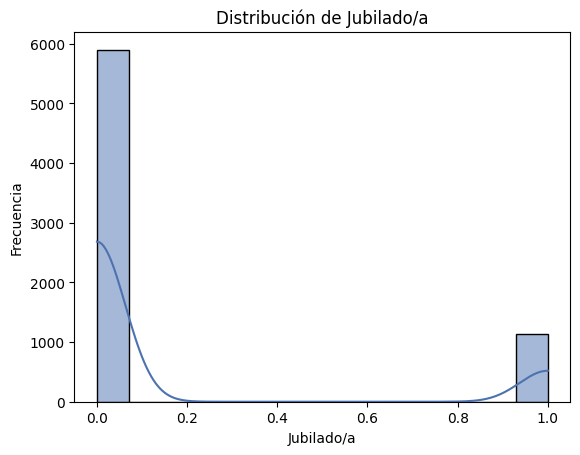

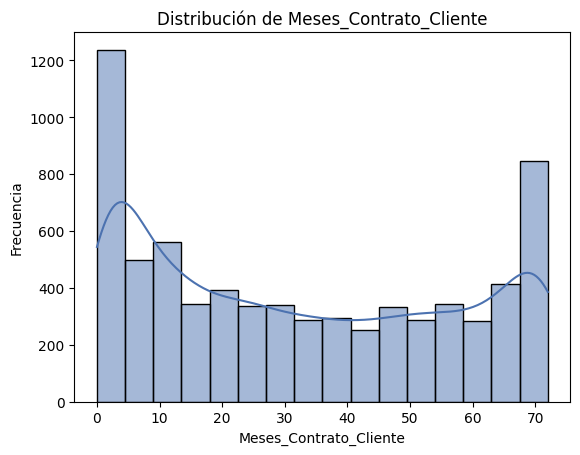

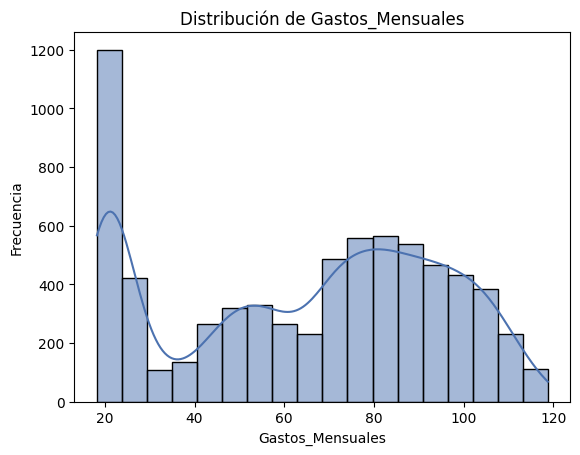

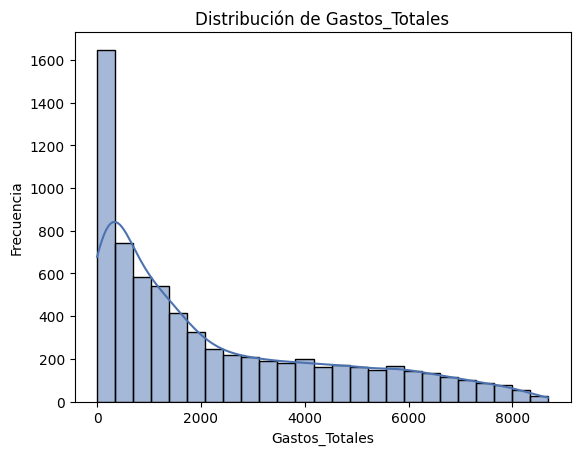

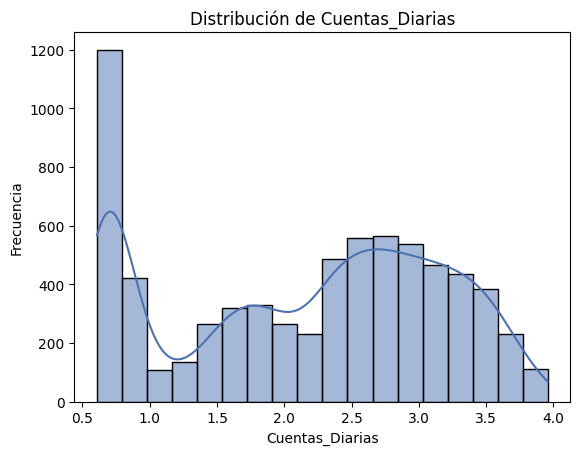

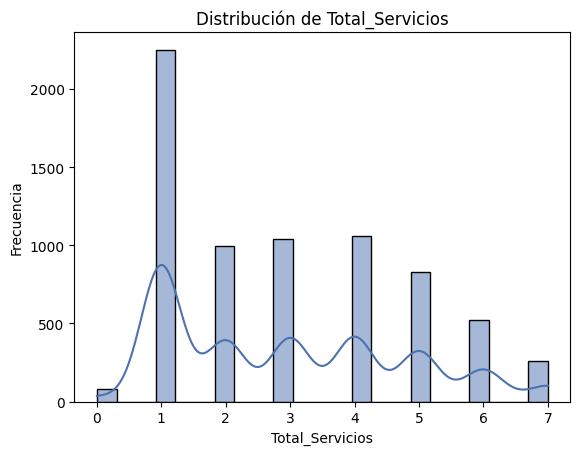

In [7]:
# Selección de columnas numéricas
num_cols = datos.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluir 'Churn' si existe
num_cols = [col for col in num_cols if col != "Churn"]

# Dibujar histogramas
for col in num_cols:
    plt.figure()
    sns.histplot(datos[col], kde=True, color=PALETA["base"])
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


##**🔹  Variables numéricas vs Churn**

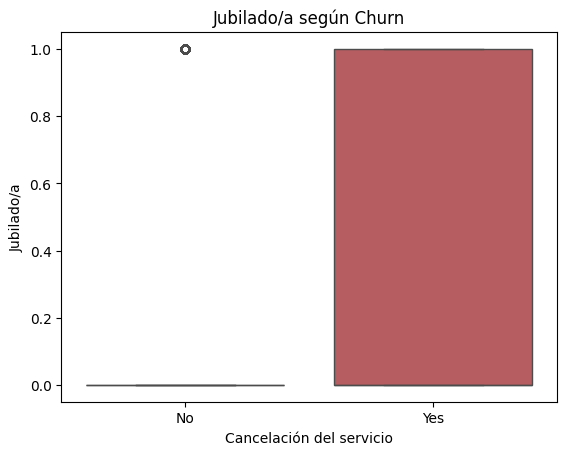

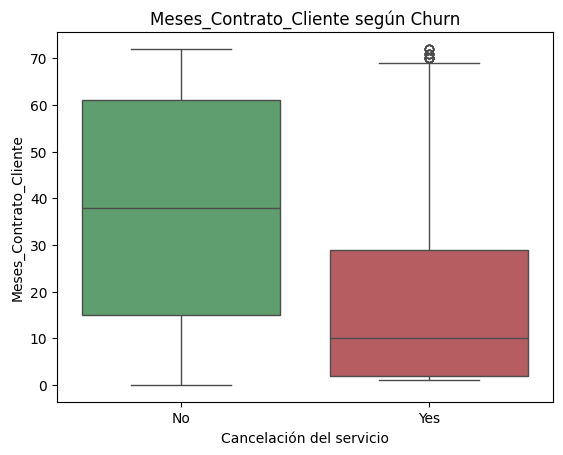

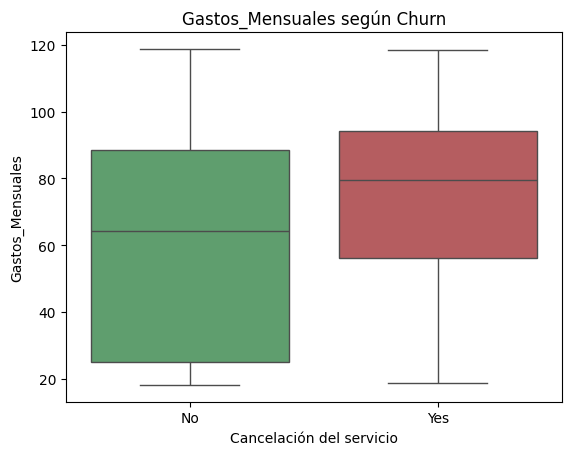

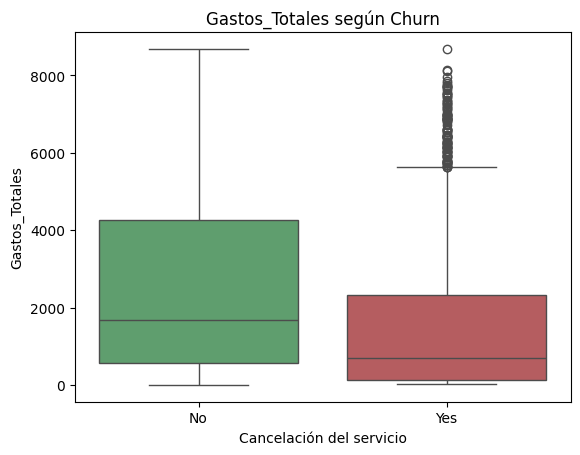

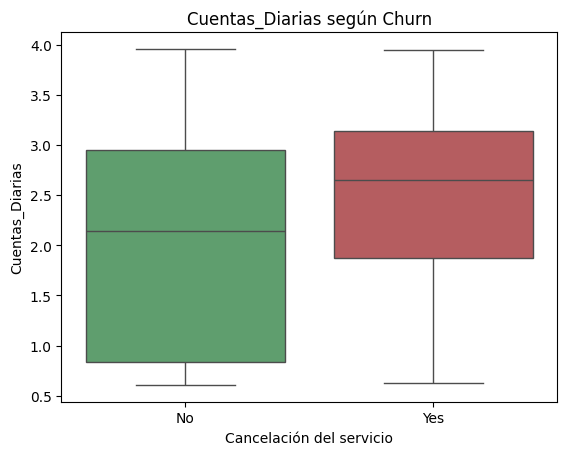

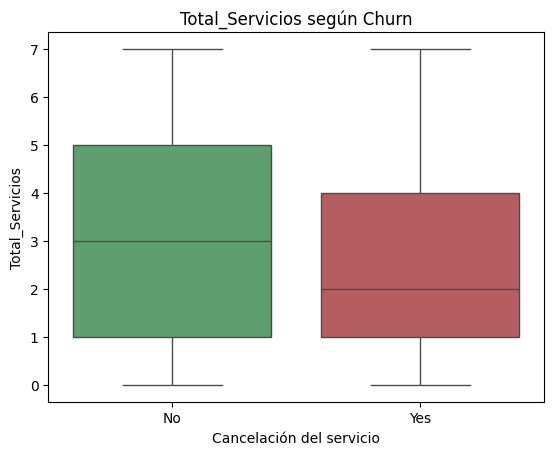

In [8]:
# Comprobamos que Churn exista
if "Churn" in datos.columns:
    for col in num_cols:
        plt.figure()
        sns.boxplot(x="Churn", y=col, data=datos, palette=[PALETA["exito"], PALETA["alerta"]])
        plt.title(f"{col} según Churn")
        plt.xlabel("Cancelación del servicio")
        plt.ylabel(col)
        plt.show()


#**🔹Variables categóricas vs Churn**

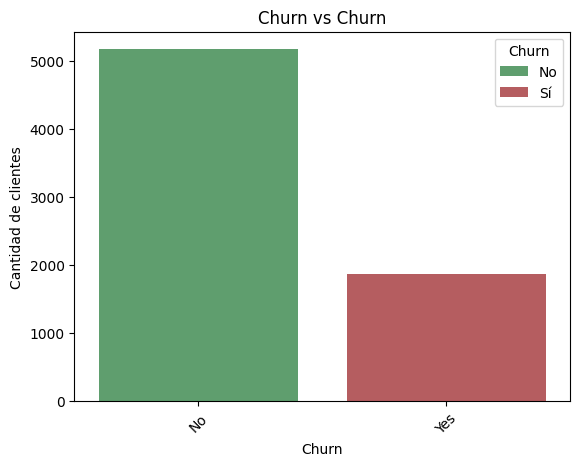

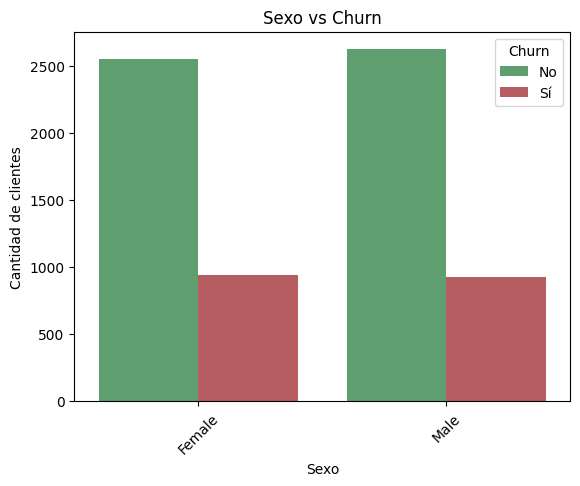

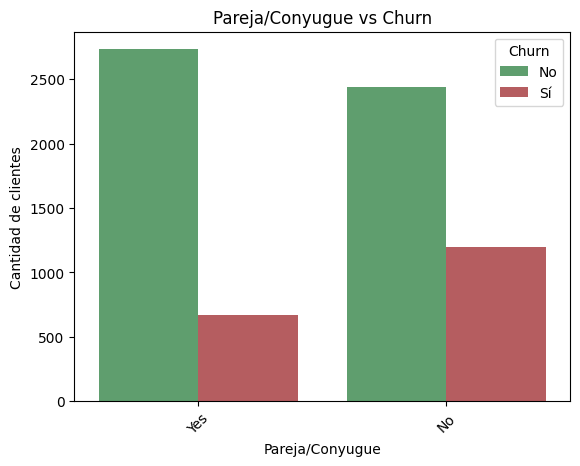

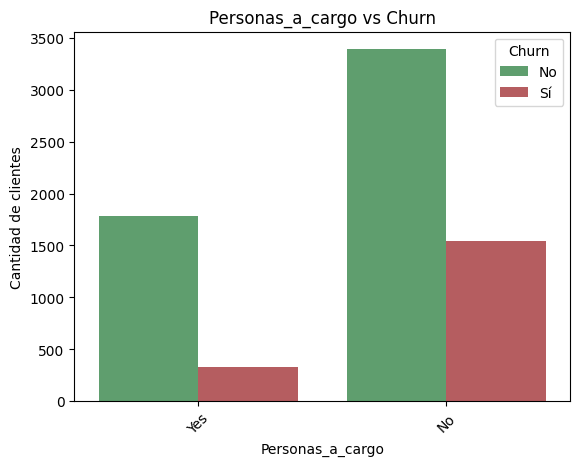

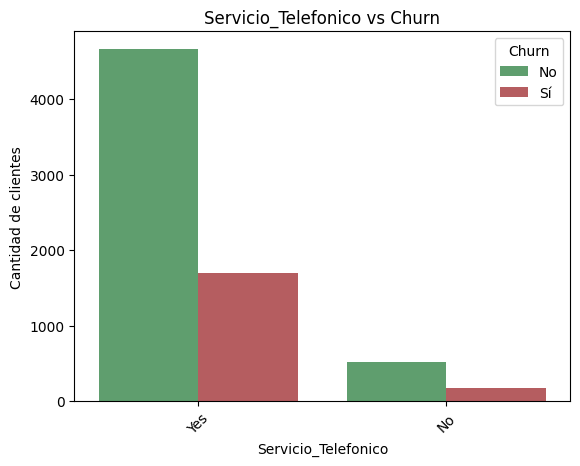

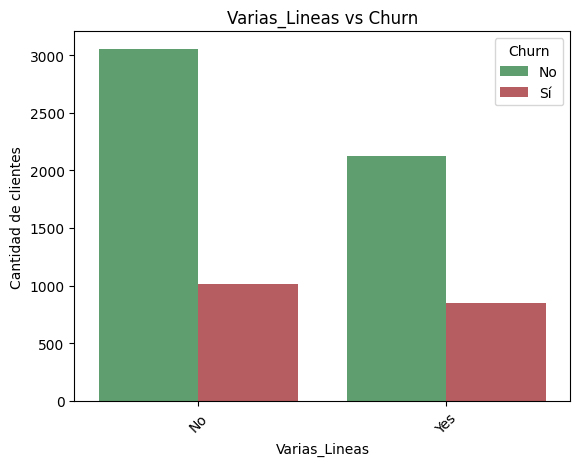

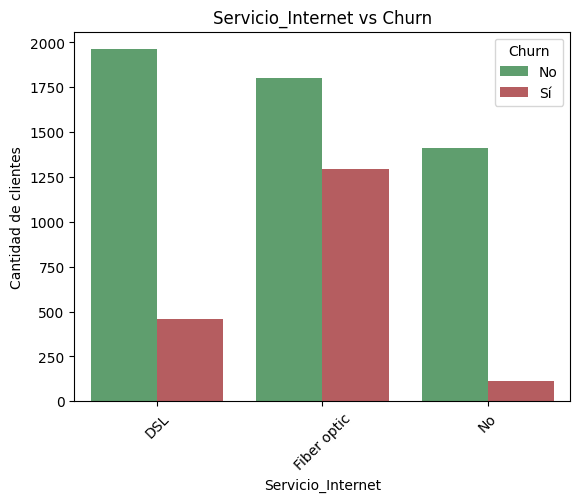

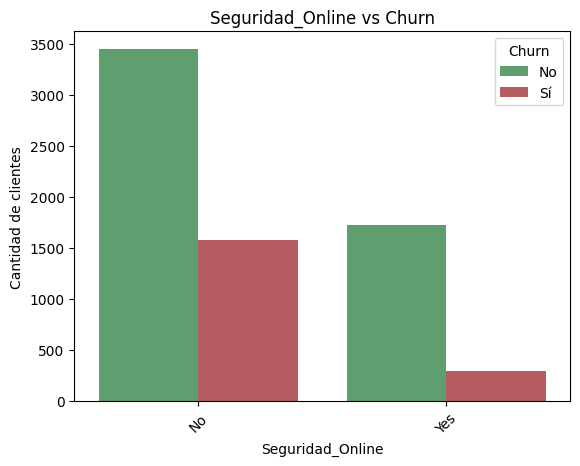

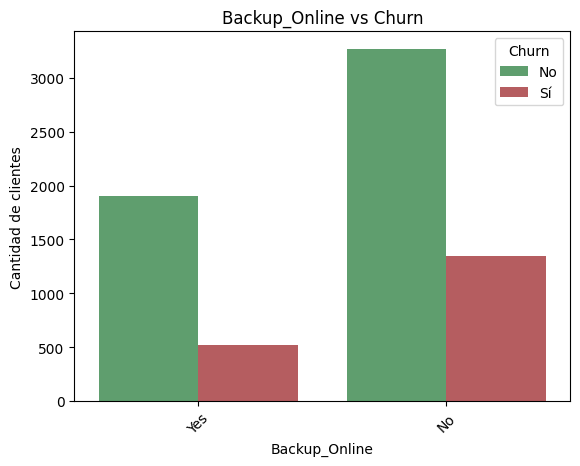

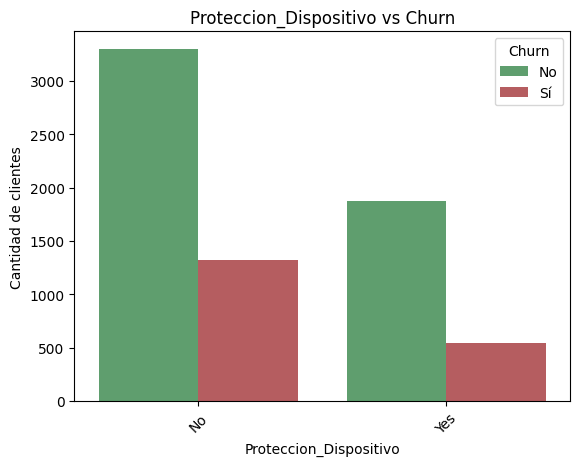

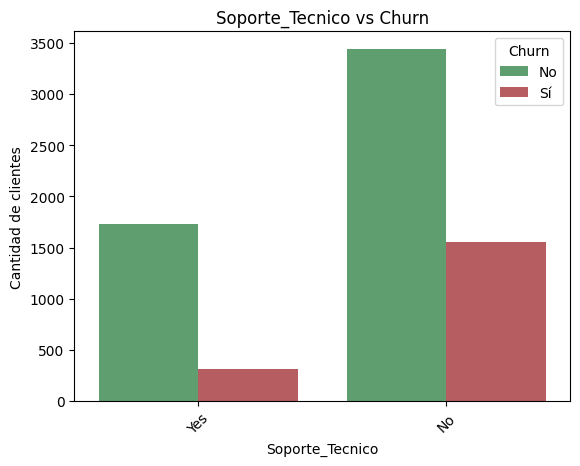

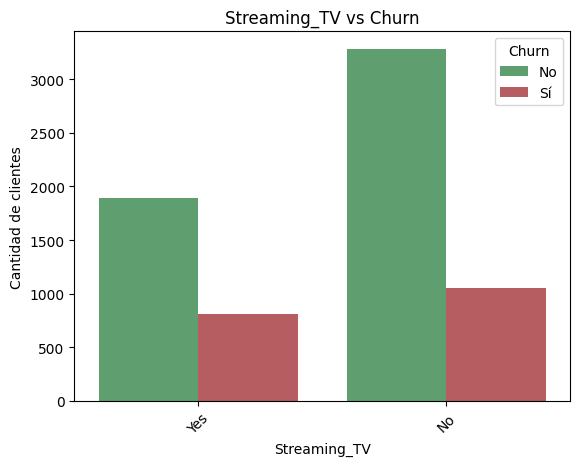

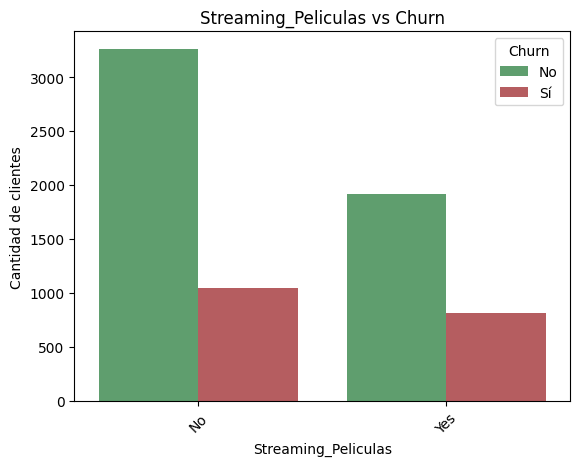

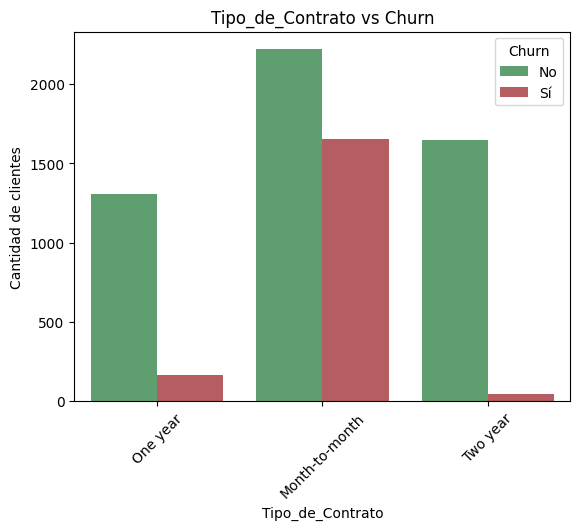

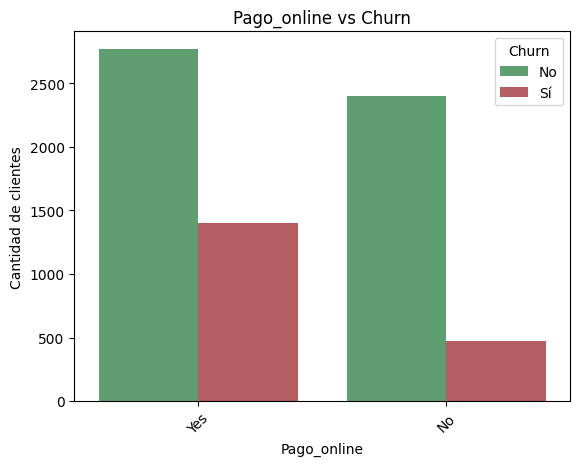

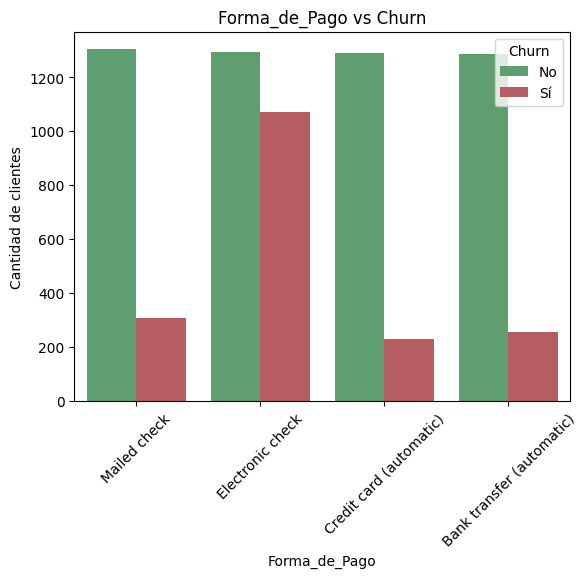

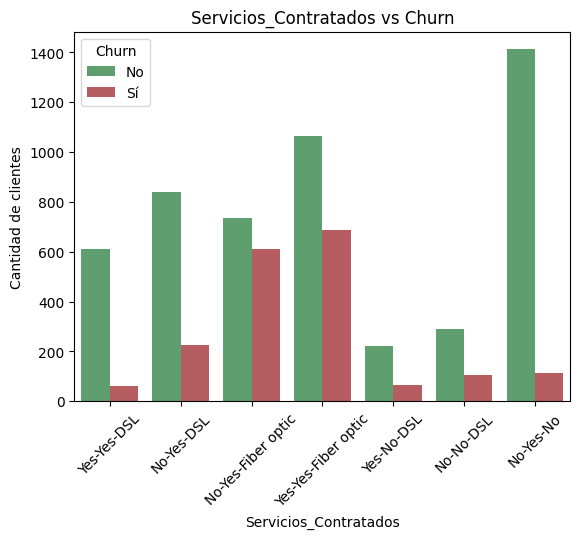

In [9]:
cat_cols = datos.select_dtypes(include=['object', 'category']).columns.tolist()

if "Churn" in datos.columns:
    for col in cat_cols:
        plt.figure()
        sns.countplot(
            x=col,
            hue="Churn",
            data=datos,
            palette=[PALETA["exito"], PALETA["alerta"]]
        )
        plt.title(f"{col} vs Churn")
        plt.xlabel(col)
        plt.ylabel("Cantidad de clientes")
        plt.legend(title="Churn", labels=["No", "Sí"])
        plt.xticks(rotation=45)
        plt.show()


##**🔹 Matriz de correlación entre variables numéricas**

Objetivo: Visualizar la relación entre las variables numéricas, identificar correlaciones fuertes y posibles redundancias.

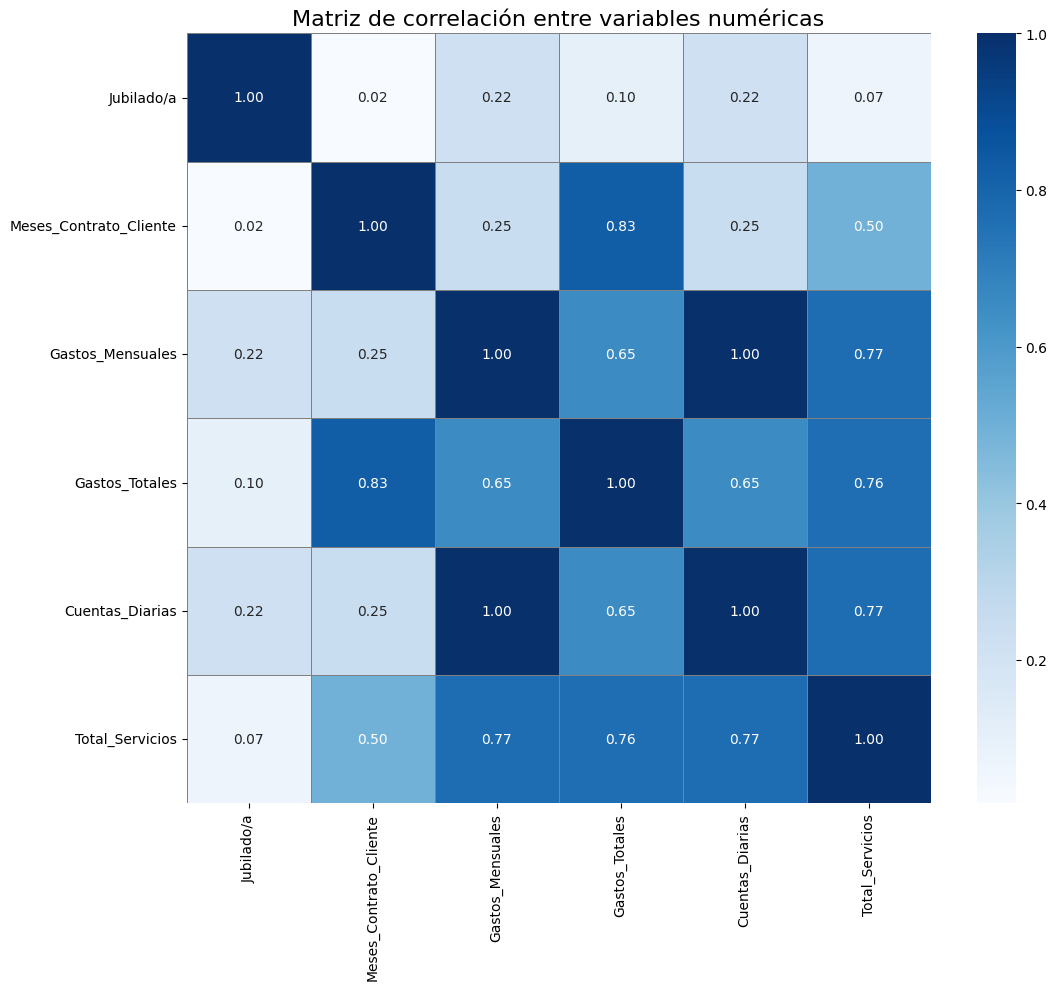

In [10]:
# Selección de columnas numéricas
num_cols = datos.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluir 'Churn' si está en la lista
num_cols = [col for col in num_cols if col != "Churn"]

# Solo proceder si hay variables numéricas
if num_cols:
    plt.figure(figsize=(12,10))
    sns.heatmap(
        datos[num_cols].corr(),
        annot=True,
        fmt=".2f",
        cmap="Blues",
        linewidths=0.5,
        linecolor='gray'
    )
    plt.title("Matriz de correlación entre variables numéricas", fontsize=16)
    plt.show()


#**🔹 Análisis de correlación y posibles redundancias**

Objetivo: Identificar variables altamente correlacionadas o redundantes que no aportan información adicional para la predicción de Churn.

In [11]:
# Definimos un umbral de correlación alta
umbral_corr = 0.85

# Calculamos la matriz de correlación absoluta
corr_matrix = datos[num_cols].corr().abs()

# Seleccionamos los pares con correlación mayor al umbral, excluyendo la diagonal
altamente_correlacionadas = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and corr_matrix.loc[col1, col2] > umbral_corr
]

# Mostramos resultados
if altamente_correlacionadas:
    print("Variables numéricas altamente correlacionadas (mayor a 0.85):")
    for col1, col2, corr_val in altamente_correlacionadas:
        print(f"{col1} ↔ {col2}: {corr_val:.2f}")
else:
    print("No se encontraron variables numéricas con correlación alta (mayor a 0.85).")


Variables numéricas altamente correlacionadas (mayor a 0.85):
Gastos_Mensuales ↔ Cuentas_Diarias: 1.00
Cuentas_Diarias ↔ Gastos_Mensuales: 1.00


#**🔹 Observaciones adicionales sobre variables categóricas**

Objetivo: Detectar columnas categóricas que podrían ser redundantes o poco informativas.

In [12]:
# Revisamos cantidad de categorías por variable
for col in cat_cols:
    n_categories = datos[col].nunique()
    print(f"{col}: {n_categories} categorías")
    if n_categories == 1:
        print(f"  - Atención: La variable '{col}' tiene una sola categoría, podría eliminarse")


Churn: 2 categorías
Sexo: 2 categorías
Pareja/Conyugue: 2 categorías
Personas_a_cargo: 2 categorías
Servicio_Telefonico: 2 categorías
Varias_Lineas: 2 categorías
Servicio_Internet: 3 categorías
Seguridad_Online: 2 categorías
Backup_Online: 2 categorías
Proteccion_Dispositivo: 2 categorías
Soporte_Tecnico: 2 categorías
Streaming_TV: 2 categorías
Streaming_Peliculas: 2 categorías
Tipo_de_Contrato: 3 categorías
Pago_online: 2 categorías
Forma_de_Pago: 4 categorías
Servicios_Contratados: 7 categorías


#**🔹 Informe de análisis previo al modelado**

Objetivo: Revisar las variables del dataset para garantizar que solo se mantenga información relevante y no redundante antes de iniciar la codificación y modelado.

**1. Variables numéricas**

Se identificó una correlación perfecta (1.00) entre las variables:

Gastos_Mensuales ↔ Cuentas_Diarias

Esto indica que ambas columnas aportan exactamente la misma información.

Decisión: Mantendremos solo Gastos_Mensuales y eliminaremos Cuentas_Diarias para evitar redundancia y mejorar la eficiencia del modelo.

**2. Variables categóricas**

Todas las columnas categóricas presentan entre 2 y 7 categorías, lo que las hace informativas para el modelo.

Ninguna columna tiene una sola categoría, por lo que todas serán mantenidas para el siguiente paso de codificación.

**3. Próximos pasos**

Eliminar la columna Cuentas_Diarias del dataset.

Mantener todas las demás columnas.

Preparar las variables categóricas para one-hot encoding y evaluar normalización o escalado de las variables numéricas.

Este análisis garantiza que nuestro dataset esté optimizado y limpio, reduciendo redundancia y mejorando la capacidad predictiva de los modelos.

#**🔹 Limpieza final de columnas**

Objetivo: Eliminar columnas redundantes y dejar el dataset listo para codificación y modelado.

In [13]:
# Eliminamos columna redundante
if "Cuentas_Diarias" in datos.columns:
    datos.drop(columns=["Cuentas_Diarias"], inplace=True)
    print("✅ Columna 'Cuentas_Diarias' eliminada por redundancia.")

# Verificamos dimensiones actuales del dataset
print(f"📐 Dimensiones actuales del dataset: {datos.shape}")

# Listado de columnas finales
print("📊 Columnas restantes:")
print(datos.columns.tolist())


✅ Columna 'Cuentas_Diarias' eliminada por redundancia.
📐 Dimensiones actuales del dataset: (7043, 22)
📊 Columnas restantes:
['Churn', 'Sexo', 'Jubilado/a', 'Pareja/Conyugue', 'Personas_a_cargo', 'Meses_Contrato_Cliente', 'Servicio_Telefonico', 'Varias_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_de_Contrato', 'Pago_online', 'Forma_de_Pago', 'Gastos_Mensuales', 'Gastos_Totales', 'Servicios_Contratados', 'Total_Servicios']


##**🔹Codificación de variables categóricas**

Objetivo: Transformar todas las columnas categóricas en formato numérico para que sean compatibles con algoritmos de machine learning.

Método seleccionado: One-Hot Encoding (pd.get_dummies)

Cada categoría de una columna se convierte en una columna binaria (0 o 1).

Se evita introducir ordenamiento numérico que no existe en variables categóricas.

In [14]:
# One-Hot Encoding de variables categóricas

# Selección de columnas categóricas (excluyendo la variable objetivo)
cat_cols = datos.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols.remove("Churn")  # Churn no se codifica ahora, se mantiene como target

# Aplicar One-Hot Encoding
datos_encoded = pd.get_dummies(datos, columns=cat_cols, drop_first=True)

# Verificamos dimensiones y columnas
print(f"📐 Dimensiones del dataset después del encoding: {datos_encoded.shape}")
print("📊 Primeras columnas después del encoding:")
print(datos_encoded.columns[:10])


📐 Dimensiones del dataset después del encoding: (7043, 31)
📊 Primeras columnas después del encoding:
Index(['Churn', 'Jubilado/a', 'Meses_Contrato_Cliente', 'Gastos_Mensuales',
       'Gastos_Totales', 'Total_Servicios', 'Sexo_Male', 'Pareja/Conyugue_Yes',
       'Personas_a_cargo_Yes', 'Servicio_Telefonico_Yes'],
      dtype='object')


#**🔹Conversión de columnas binarias a numéricas**

Objetivo: Asegurar que todas las columnas sean numéricas, incluyendo las variables categóricas codificadas como booleanas, para garantizar compatibilidad completa con los algoritmos de machine learning.

In [15]:
# Convertir columnas booleanas a int (0/1)
bool_cols = datos_encoded.select_dtypes(include=['bool']).columns
datos_encoded[bool_cols] = datos_encoded[bool_cols].astype(int)

# Convertir la variable objetivo 'Churn' a binaria
# Suponiendo que Churn tiene valores "Yes" y "No"
datos_encoded['Churn'] = datos_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Verificamos resultados
print("✅ Todas las columnas binarias y 'Churn' convertidas a numéricas (int).")
print("📊 Tipos de datos actuales:")
print(datos_encoded.dtypes.value_counts())


✅ Todas las columnas binarias y 'Churn' convertidas a numéricas (int).
📊 Tipos de datos actuales:
int64      29
float64     2
Name: count, dtype: int64


#**🔹 Escalado de variables numéricas**
Objetivo: Normalizar las variables numéricas para que tengan media 0 y desviación estándar 1, asegurando que todos los algoritmos trabajen con la misma escala.

Método: StandardScaler de sklearn

In [16]:
# Selección de columnas numéricas a escalar
num_cols = ['Meses_Contrato_Cliente', 'Gastos_Mensuales', 'Gastos_Totales', 'Total_Servicios']

# Inicializamos el scaler
scaler = StandardScaler()

# Aplicamos el escalado
datos_encoded[num_cols] = scaler.fit_transform(datos_encoded[num_cols])

# Verificamos los primeros valores
print("✅ Variables numéricas escaladas correctamente.")
print(datos_encoded[num_cols].head())


✅ Variables numéricas escaladas correctamente.
   Meses_Contrato_Cliente  Gastos_Mensuales  Gastos_Totales  Total_Servicios
0               -0.951682          0.027862       -0.744026         0.574326
1               -0.951682         -0.161583       -0.766482        -0.510409
2               -1.155283          0.303720       -0.881874        -0.510409
3               -0.788800          1.104706       -0.459662         1.116693
4               -1.196004          0.636080       -0.887808         0.031958


#🔹**Evaluación del desbalance de clases**

Objetivo: verificar si hay muchos más clientes activos que cancelaron, lo cual puede afectar los modelos predictivos.

In [17]:
# Evaluación de desbalance de clases

# Contar los valores de la variable objetivo
churn_counts = datos_encoded['Churn'].value_counts()

# Calcular proporciones
churn_proportion = churn_counts / len(datos_encoded)

print("📊 Distribución de la variable 'Churn':")
print(churn_counts)
print("\n📈 Proporción de clases:")
print(churn_proportion)


📊 Distribución de la variable 'Churn':
Churn
0    5174
1    1869
Name: count, dtype: int64

📈 Proporción de clases:
Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


#**🔹Preparación para balanceo de clases**

Objetivo: dejar el dataset listo para entrenar modelos, evaluando técnicas de balanceo si fuera necesario.

In [18]:
# Preparación para balanceo de clases

# Separar variables predictoras y objetivo
X = datos_encoded.drop(columns=['Churn'])
y = datos_encoded['Churn']

# Guardamos los nombres de las columnas para uso posterior
columnas_features = X.columns.tolist()

print("✅ Dataset preparado para entrenamiento y técnicas de balanceo.")
print(f"Total de features: {len(columnas_features)}")
print(f"Tamaño de X: {X.shape}, Tamaño de y: {y.shape}")


✅ Dataset preparado para entrenamiento y técnicas de balanceo.
Total de features: 30
Tamaño de X: (7043, 30), Tamaño de y: (7043,)


#**🔹Balanceo de clases**

Objetivo: Corregir el desbalance en la variable objetivo Churn usando SMOTENC (oversampling) para variables categóricas codificadas como binarias y numéricas. Esto ayuda a que los modelos aprendan mejor las clases minoritarias.

In [19]:
# Identificar columnas categóricas binarias
# Las columnas booleanas se convirtieron a int automáticamente para SMOTENC
categorical_features_idx = [i for i, col in enumerate(X.columns) if X[col].dtype == 'bool' or X[col].dtype == 'int64' and col not in ['Meses_Contrato_Cliente', 'Gastos_Mensuales', 'Gastos_Totales', 'Total_Servicios']]

# Inicializamos SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features_idx, random_state=42)

# Aplicamos balanceo
X_bal, y_bal = smote_nc.fit_resample(X, y)

# Verificar nueva proporción de clases
proporcion_bal = y_bal.value_counts() / len(y_bal)

print("✅ Balanceo de clases aplicado con SMOTENC.")
print("📊 Distribución de clases después del balanceo:")
print(y_bal.value_counts())
print("\n📈 Proporción de clases después del balanceo:")
print(proporcion_bal)


✅ Balanceo de clases aplicado con SMOTENC.
📊 Distribución de clases después del balanceo:
Churn
0    5174
1    5174
Name: count, dtype: int64

📈 Proporción de clases después del balanceo:
Churn
0    0.5
1    0.5
Name: count, dtype: float64


## Balanceo de Clases con SMOTENC

Se detectó un **desbalance de clases** en la variable objetivo `Churn`:

- Clientes activos: 5174 (73.5%)
- Clientes que cancelaron: 1869 (26.5%)

Para corregirlo y mejorar la capacidad predictiva de los modelos, aplicamos **SMOTENC**, generando ejemplos sintéticos de la clase minoritaria.  
Después del balanceo, la proporción de clases es **50% / 50%**, dejando el dataset listo para el modelado.


#**🔹Evaluación de normalización/escalado de datos**

Objetivo: Determinar si necesitamos normalizar o estandarizar los datos según los modelos que vamos a entrenar.

In [20]:

# Evaluación de necesidad de escalado


# Variables numéricas que podrían necesitar escalado para modelos sensibles a la distancia
num_cols = ['Meses_Contrato_Cliente', 'Gastos_Mensuales', 'Gastos_Totales', 'Total_Servicios']

# Ver estadísticas básicas
print("📊 Estadísticas descriptivas de las variables numéricas:")
print(X_bal[num_cols].describe())

# Observación:
print("""
🔹 Observaciones:
- Algoritmos basados en distancia (KNN, SVM, Regresión Logística, Redes Neuronales)
  requieren escalado de estas variables.
- Algoritmos basados en árboles (Decision Tree, Random Forest, XGBoost)
  no requieren escalado, ya que son invariantes a la magnitud de las variables.
""")


📊 Estadísticas descriptivas de las variables numéricas:
       Meses_Contrato_Cliente  Gastos_Mensuales  Gastos_Totales  \
count            10348.000000      10348.000000    10348.000000   
mean                -0.192264          0.102811       -0.107332   
std                  0.978157          0.960784        0.964433   
min                 -1.318165         -1.545860       -1.005780   
25%                 -1.114563         -0.643504       -0.885227   
50%                 -0.463037          0.323662       -0.505701   
75%                  0.677133          0.877040        0.425280   
max                  1.613701          1.794352        2.825806   

       Total_Servicios  
count     10348.000000  
mean         -0.047581  
std           0.951926  
min          -1.595144  
25%          -1.052777  
50%           0.031958  
75%           0.574326  
max           2.201428  

🔹 Observaciones:
- Algoritmos basados en distancia (KNN, SVM, Regresión Logística, Redes Neuronales)
  requieren e

#**🔹 Análisis de correlaciones entre variables numéricas y la variable objetivo (Churn)**

Este bloque de código hace lo siguiente:

Calcula la matriz de correlación con corr().

Muestra un mapa de calor (heatmap) para visualizar las relaciones.

Destaca las correlaciones más relevantes con respecto a Churn.

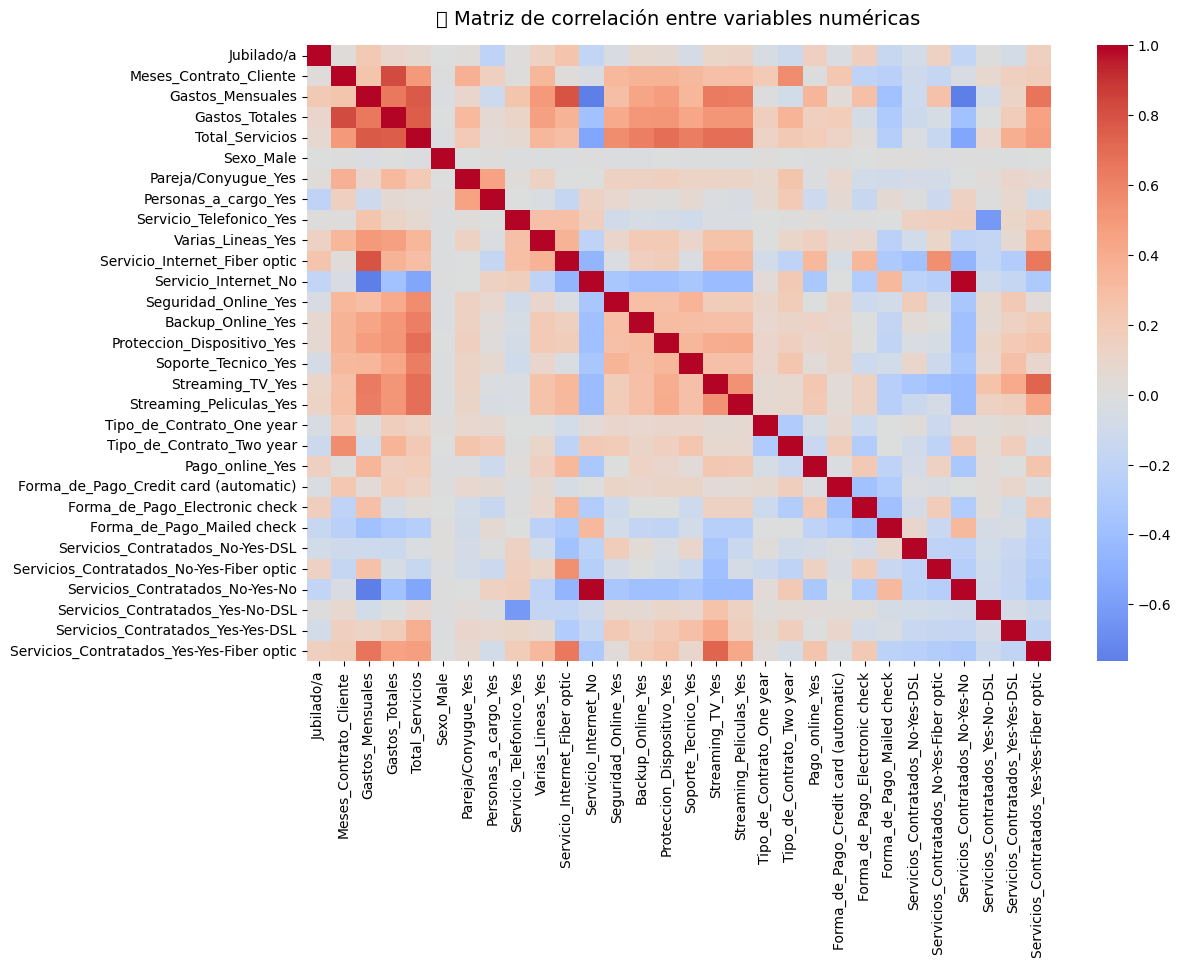

📊 Variables con correlación fuerte con Churn (|correlación| > 0.2):

Churn                                       1.000000
Servicio_Internet_Fiber optic               0.308020
Forma_de_Pago_Electronic check              0.301919
Servicios_Contratados_No-Yes-Fiber optic    0.206772
Servicios_Contratados_No-Yes-No            -0.227890
Servicio_Internet_No                       -0.227890
Tipo_de_Contrato_Two year                  -0.302253
Meses_Contrato_Cliente                     -0.352229
Name: Churn, dtype: float64


In [21]:
# Separar X e y
X = datos_encoded.drop(columns=["Churn"])
y = datos_encoded["Churn"]

# 1️⃣ Calcular matriz de correlación
corr_matrix = X.corr()

# 2️⃣ Visualizar heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("🔎 Matriz de correlación entre variables numéricas", fontsize=14, pad=15)
plt.show()

# 3️⃣ Correlación de variables con Churn
correlacion_churn = pd.concat([X, y.reset_index(drop=True)], axis=1).corr()["Churn"].sort_values(ascending=False)

# Mostrar solo variables con correlación fuerte (> 0.2 o < -0.2)
umbral = 0.2
correlacion_fuerte = correlacion_churn[correlacion_churn.abs() > umbral]

print(f"📊 Variables con correlación fuerte con Churn (|correlación| > {umbral}):\n")
print(correlacion_fuerte)


#**📊🔹 Correlaciones de Variables Numéricas con Churn**

Objetivo: Identificar cuáles variables numéricas tienen mayor relación con la cancelación de clientes (Churn) para priorizar en el modelado.

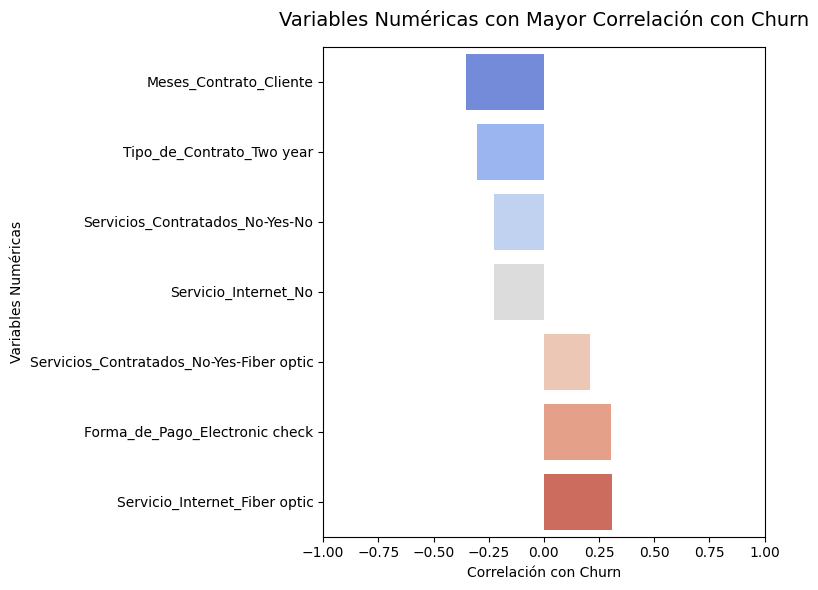

📊 Variables numéricas más relevantes con Churn:

Meses_Contrato_Cliente                     -0.352229
Tipo_de_Contrato_Two year                  -0.302253
Servicios_Contratados_No-Yes-No            -0.227890
Servicio_Internet_No                       -0.227890
Servicios_Contratados_No-Yes-Fiber optic    0.206772
Forma_de_Pago_Electronic check              0.301919
Servicio_Internet_Fiber optic               0.308020
Name: Churn, dtype: float64


In [22]:
# Variables numéricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_num = X[num_cols]

# Calcular correlación con Churn
corr_num = pd.concat([X_num, y.reset_index(drop=True)], axis=1).corr()["Churn"]

# Ordenar los valores de correlación
corr_num = corr_num.sort_values()

# Filtrar solo correlaciones significativas (>|0.2|)
umbral = 0.2
corr_num_fuerte = corr_num[corr_num.abs() > umbral].drop("Churn")

# Visualizar
plt.figure(figsize=(8,6))
sns.barplot(x=corr_num_fuerte.values, y=corr_num_fuerte.index, palette="coolwarm")
plt.title("Variables Numéricas con Mayor Correlación con Churn", fontsize=14, pad=15)
plt.xlabel("Correlación con Churn")
plt.ylabel("Variables Numéricas")
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

# Mostrar en consola
print("📊 Variables numéricas más relevantes con Churn:\n")
print(corr_num_fuerte)


###**🔹 Interpretación:**

Las variables con correlación positiva sugieren que a mayor valor, mayor riesgo de cancelación.

Las variables con correlación negativa sugieren que a mayor valor, menor riesgo de cancelación.

Estas serán clave en el modelado y en la interpretación de resultados.

##**Correlaciones de Variables Categóricas Transformadas con Churn**

Objetivo: Evaluar la relación entre las variables categóricas convertidas a formato numérico (one-hot / booleanas) y Churn.

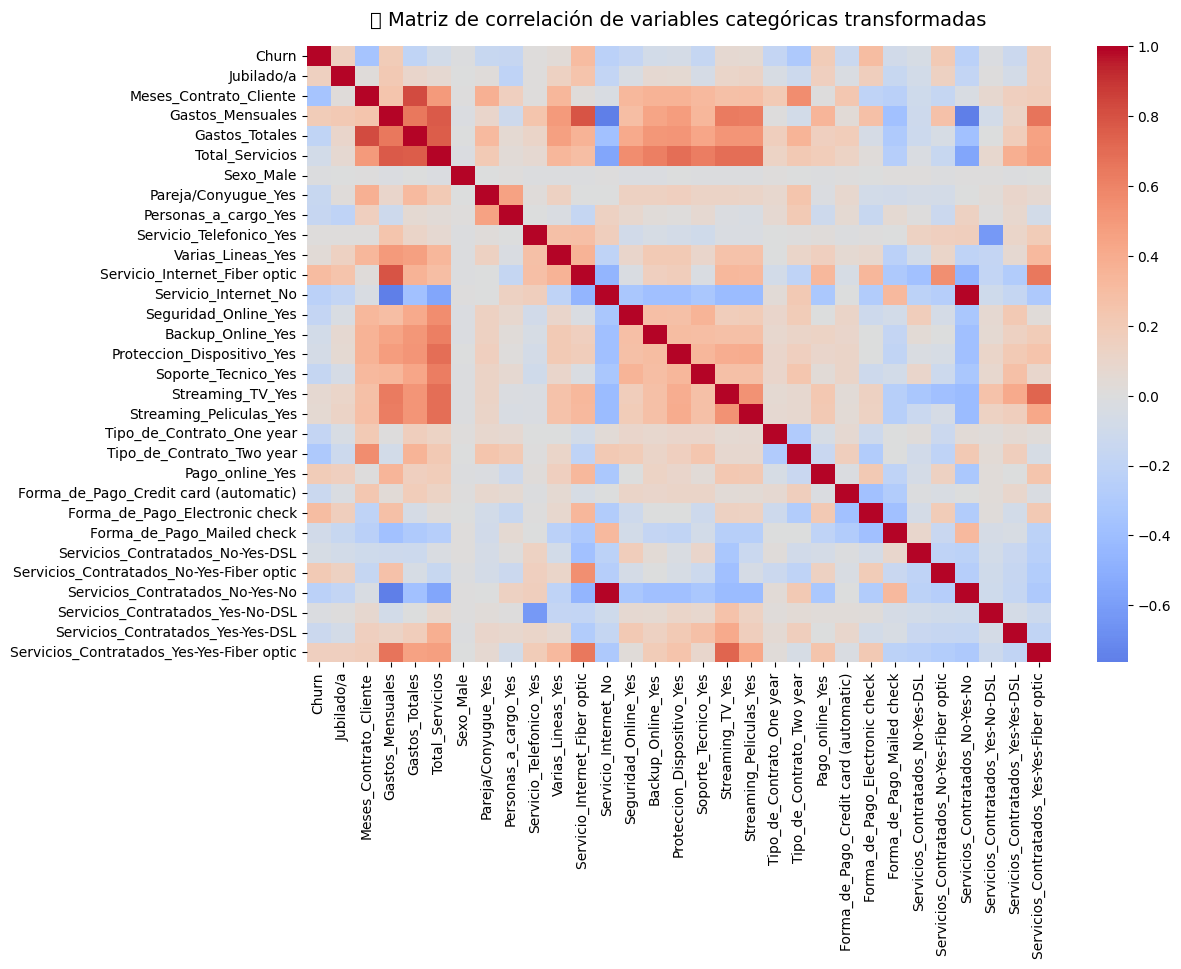

📊 Variables categóricas transformadas con correlación fuerte con Churn (|correlación| > 0.2):

Churn                                       1.000000
Servicio_Internet_Fiber optic               0.308020
Forma_de_Pago_Electronic check              0.301919
Servicios_Contratados_No-Yes-Fiber optic    0.206772
Servicios_Contratados_No-Yes-No            -0.227890
Servicio_Internet_No                       -0.227890
Tipo_de_Contrato_Two year                  -0.302253
Meses_Contrato_Cliente                     -0.352229
Name: Churn, dtype: float64


In [23]:
# Matriz de correlación de todo el dataframe
corr_matrix = datos_encoded.corr()

# Visualizar heatmap de variables categóricas transformadas
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("🔎 Matriz de correlación de variables categóricas transformadas", fontsize=14, pad=15)
plt.show()

# Correlación de cada variable con Churn
correlacion_churn_cat = corr_matrix["Churn"].sort_values(ascending=False)

# Filtrar solo correlaciones significativas (>|0.2|)
umbral = 0.2
correlacion_fuerte_cat = correlacion_churn_cat[correlacion_churn_cat.abs() > umbral]
print("📊 Variables categóricas transformadas con correlación fuerte con Churn (|correlación| > 0.2):\n")
print(correlacion_fuerte_cat)


**#🔹 Análisis Dirigido: Relación de Variables Clave con la Cancelación**

En este bloque exploramos cómo algunas variables numéricas y categóricas se relacionan con la cancelación de clientes (Churn). Nos enfocaremos en:

Meses de contrato del cliente vs Churn

Gastos totales vs Churn

Se utilizan boxplots para visualizar la distribución de los valores en cada categoría de Churn y detectar patrones claros.

##**🔹 Boxplot: Tiempo de Contrato × Cancelación**

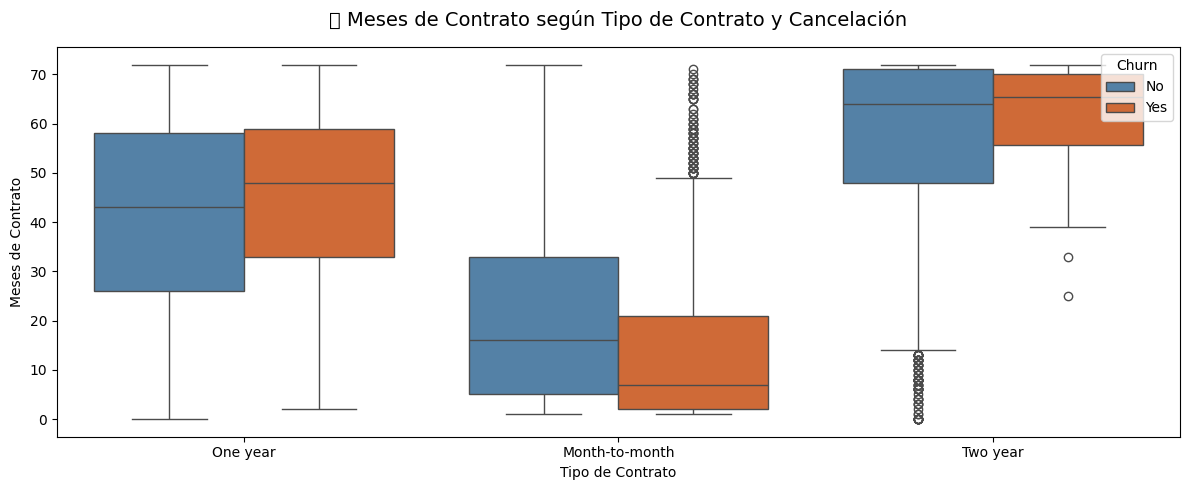

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Tipo_de_Contrato', y='Meses_Contrato_Cliente', hue='Churn',
            data=datos, palette=[AZUL_1, NARANJA_1])
plt.title("📦 Meses de Contrato según Tipo de Contrato y Cancelación", fontsize=14, pad=15)
plt.xlabel("Tipo de Contrato")
plt.ylabel("Meses de Contrato")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()


*Observamos cómo la duración del contrato se distribuye según la cancelación*

*Los clientes con contratos mensuales (Month-to-month) tienden a cancelar más que los que tienen contratos anuales (One year o Two year).*

*Esta variable es un fuerte predictor de Churn, confirmando la correlación negativa observada anteriormente.*

##**🔹 Boxplot: Gasto Total × Cancelación**

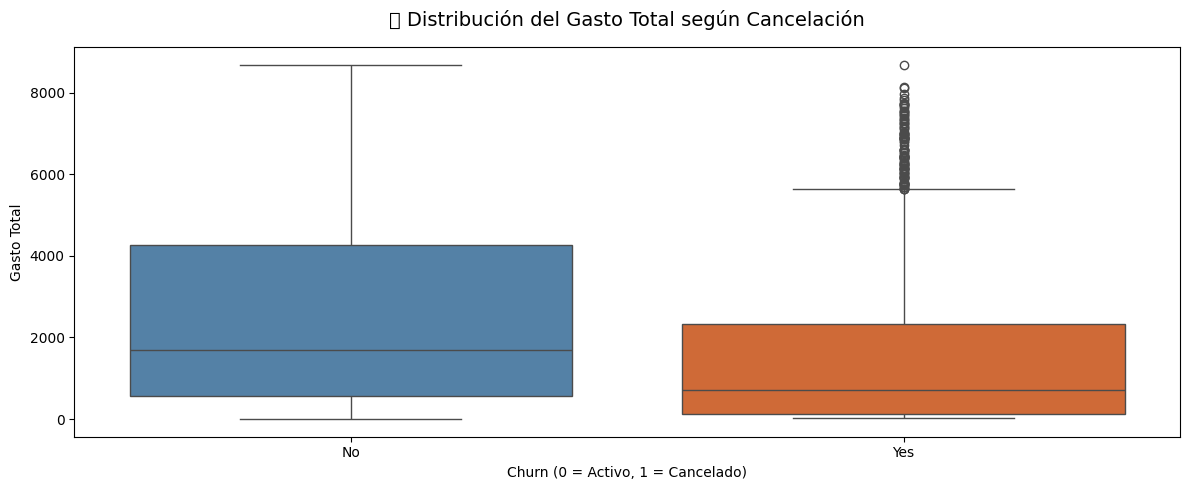

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Churn', y='Gastos_Totales', data=datos, palette=[AZUL_1, NARANJA_1])
plt.title("💰 Distribución del Gasto Total según Cancelación", fontsize=14, pad=15)
plt.xlabel("Churn (0 = Activo, 1 = Cancelado)")
plt.ylabel("Gasto Total")
plt.tight_layout()
plt.show()


*Los clientes que cancelan (Churn = 1) muestran una ligera tendencia a tener gastos totales más altos en comparación con los activos (Churn = 0).*

*Esto puede indicar que los clientes con mayor consumo son más propensos a cancelar, tal vez debido a expectativas insatisfechas o costos acumulados.*

*Esta variable también es relevante para modelado predictivo.*

##**🔹 Scatter plot: Meses de Contrato × Gasto Total con Churn**

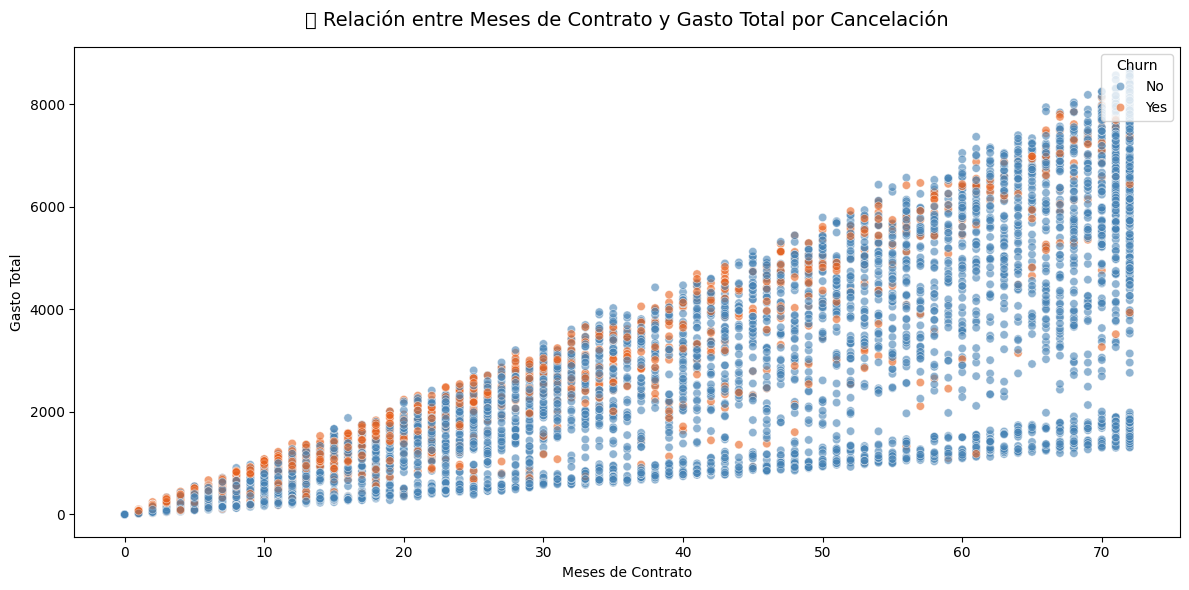

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Meses_Contrato_Cliente', y='Gastos_Totales', hue='Churn',
                data=datos, palette=[AZUL_1, NARANJA_1], alpha=0.6)
plt.title("📊 Relación entre Meses de Contrato y Gasto Total por Cancelación", fontsize=14, pad=15)
plt.xlabel("Meses de Contrato")
plt.ylabel("Gasto Total")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()


*Se puede observar que los clientes con meses de contrato bajos y gastos altos tienen mayor tendencia a cancelar.*

*Aquellos con contratos largos tienden a mantener un gasto moderado y permanecen activos.*

*Esta visualización ayuda a identificar segmentos de riesgo de cancelación para estrategias de retención.*

##**🔹 Boxplot: Servicio de Internet × Cancelación**

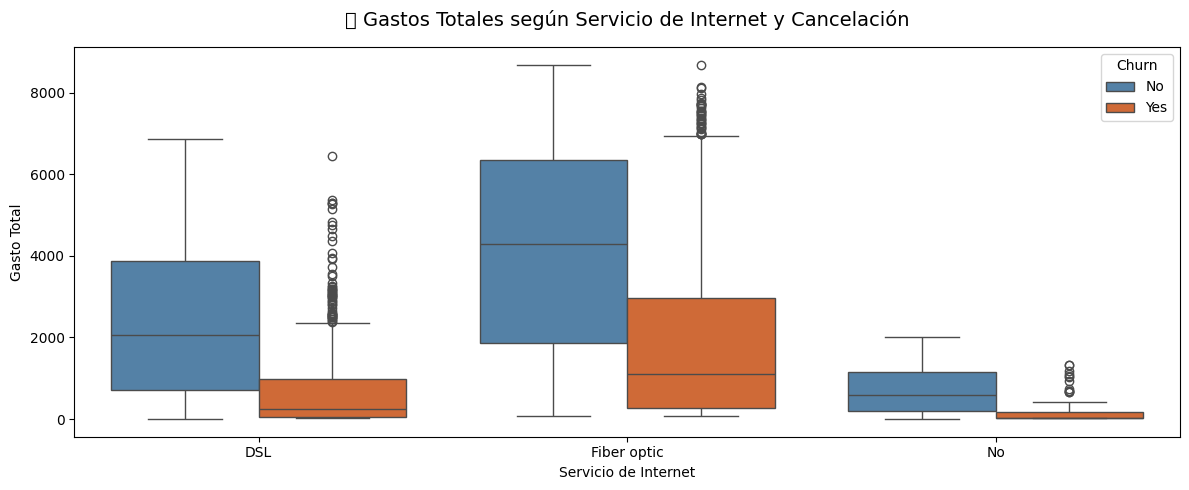

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Servicio_Internet', y='Gastos_Totales', hue='Churn',
            data=datos, palette=[AZUL_1, NARANJA_1])
plt.title("🌐 Gastos Totales según Servicio de Internet y Cancelación", fontsize=14, pad=15)
plt.xlabel("Servicio de Internet")
plt.ylabel("Gasto Total")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()


*Los clientes con Internet de fibra óptica (Fiber optic) presentan un mayor riesgo de cancelación en comparación con los que tienen DSL o sin servicio.*

*Esto coincide con la correlación positiva observada previamente y destaca a Servicio_Internet_Fiber optic como una variable clave para modelado predictivo.*

##**🔹 Boxplot: Forma de Pago × Cancelación**

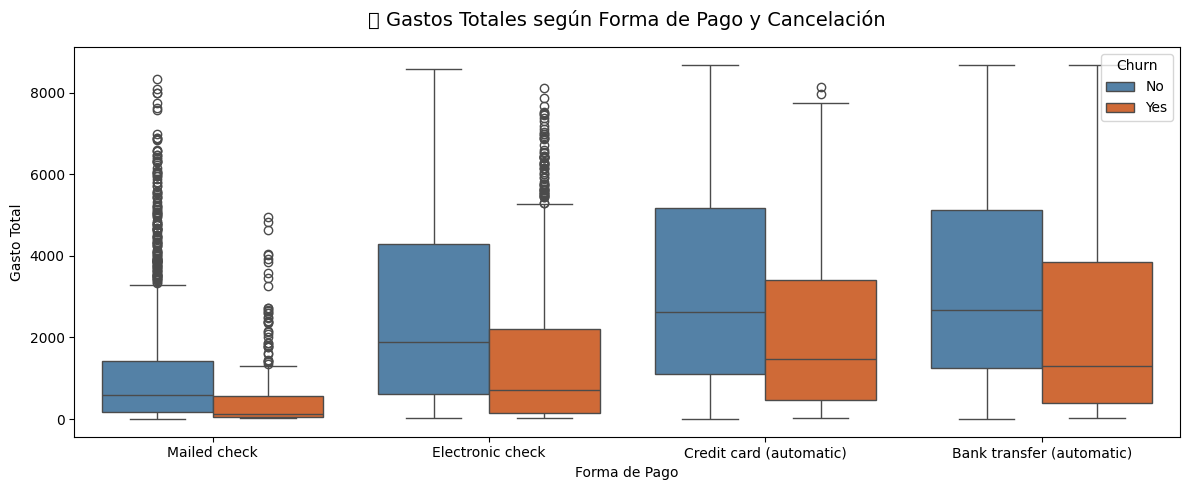

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Forma_de_Pago', y='Gastos_Totales', hue='Churn',
            data=datos, palette=[AZUL_1, NARANJA_1])
plt.title("💳 Gastos Totales según Forma de Pago y Cancelación", fontsize=14, pad=15)
plt.xlabel("Forma de Pago")
plt.ylabel("Gasto Total")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()


*Los clientes que usan Electronic check muestran una mayor tendencia a cancelar*

*Esta variable coincide con la correlación positiva que habíamos detectado.*

*Podría reflejar que métodos de pago automáticos o más confiables reducen la cancelación.*

##**🔹 Boxplot: Servicios Contratados × Cancelación**

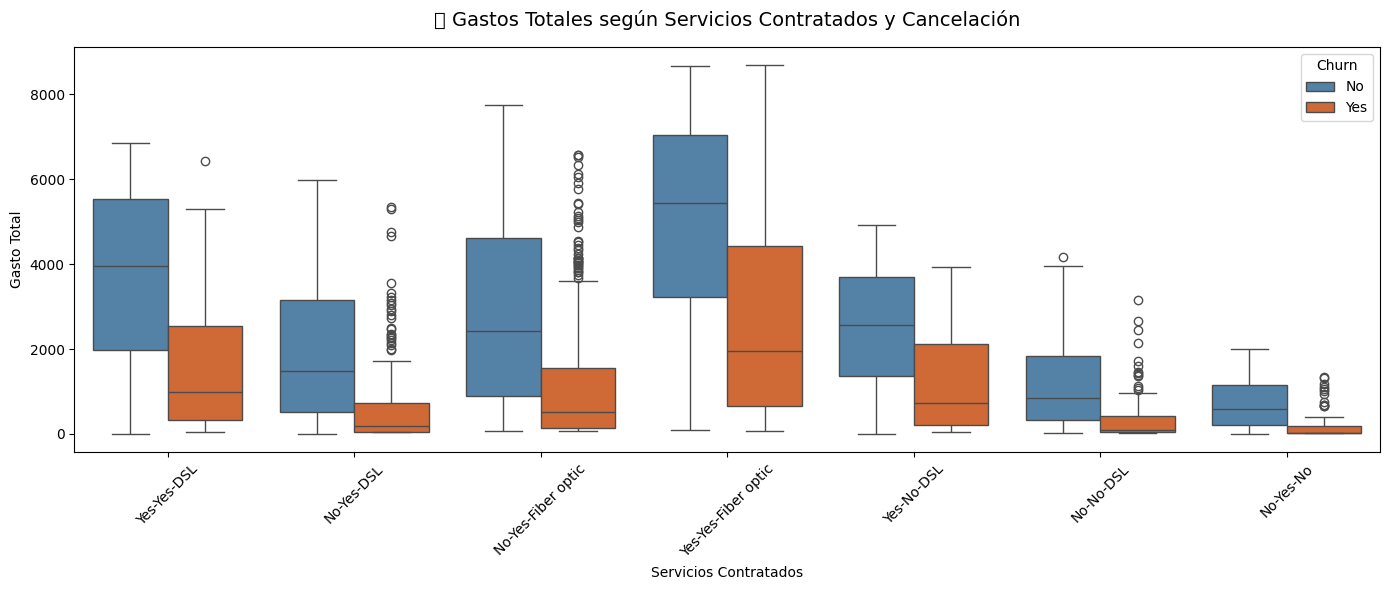

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Servicios_Contratados', y='Gastos_Totales', hue='Churn',
            data=datos, palette=[AZUL_1, NARANJA_1])
plt.title("📦 Gastos Totales según Servicios Contratados y Cancelación", fontsize=14, pad=15)
plt.xlabel("Servicios Contratados")
plt.ylabel("Gasto Total")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()


*Algunos paquetes de servicios (ej. No-Yes-Fiber optic) presentan mayor riesgo de cancelación.*

*Los clientes con combinaciones de servicios específicas tienen patrones de cancelación más marcados, lo que los hace candidatos para segmentación y estrategias de retención.*

##**🔹 Scatter plot: Meses de Contrato × Gastos Totales (Categorizado por Internet y Churn)**

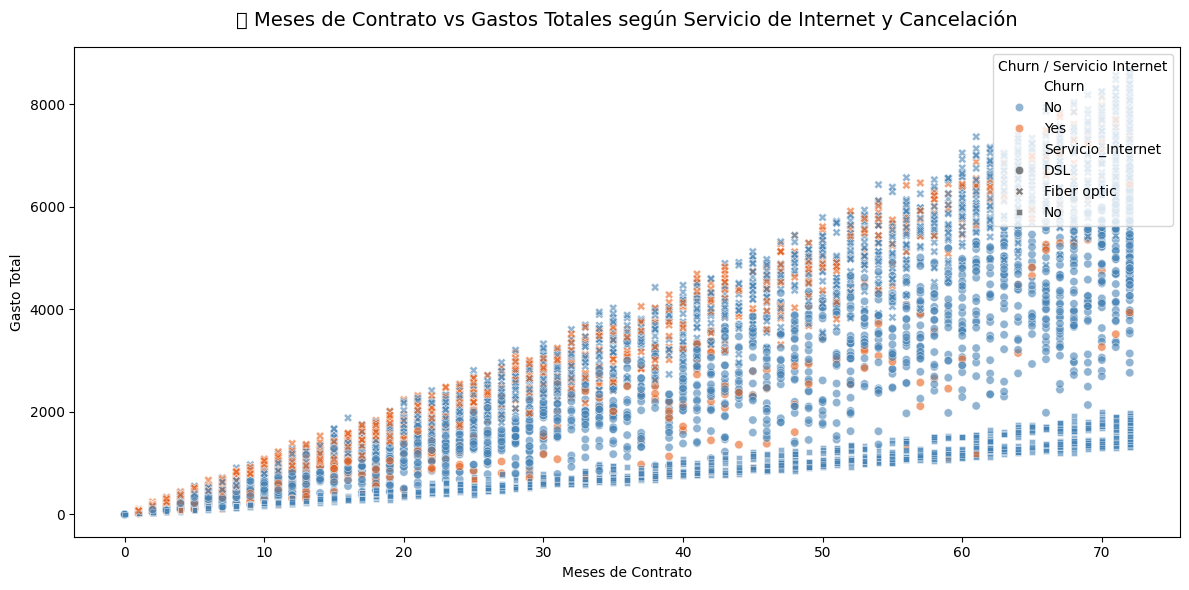

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Meses_Contrato_Cliente', y='Gastos_Totales', hue='Churn', style='Servicio_Internet',
                data=datos, palette=[AZUL_1, NARANJA_1], alpha=0.6)
plt.title("📊 Meses de Contrato vs Gastos Totales según Servicio de Internet y Cancelación", fontsize=14, pad=15)
plt.xlabel("Meses de Contrato")
plt.ylabel("Gasto Total")
plt.legend(title="Churn / Servicio Internet", loc='upper right')
plt.tight_layout()
plt.show()


*Se visualiza que los clientes con meses de contrato bajos y Fibra óptica tienen un mayor riesgo de cancelar, mientras que los clientes con DSL o contratos largos tienden a permanecer activos.*

*Esta combinación de variables es clave para construir modelos predictivos más precisos y estrategias de retención segmentadas.*

###**🔹 Conclusión General **
*Los clientes con contratos cortos presentan mayor riesgo de cancelación.*

*Los que usan Fiber optic o Electronic check tienen más probabilidad de churn.

*Ciertas combinaciones de servicios contratados influyen notablemente en la cancelación.*

*Observación: Estas variables destacan como las más relevantes para predecir churn y serán clave en el modelado.

#**🔹 División del Conjunto de Datos en Entrenamiento y Prueba**

Para evaluar el rendimiento de los modelos de manera objetiva, es necesario separar los datos en:

Conjunto de entrenamiento: usado para ajustar los modelos.

Conjunto de prueba: usado para evaluar cómo se desempeña el modelo con datos no vistos.

Se suele utilizar una proporción de 70/30 o 80/20 dependiendo del tamaño del dataset. Además, se recomienda estratificar la división según la variable objetivo (Churn) para mantener la proporción de clases en ambos conjuntos, especialmente si hay desbalance.

In [31]:


# Separar X e y
X = datos_encoded.drop(columns=["Churn"])
y = datos_encoded["Churn"]

# División estratificada del dataset (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Mostrar tamaños de los conjuntos
print(f"📊 Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"📊 Tamaño del conjunto de prueba: {X_test.shape[0]} registros")


📊 Tamaño del conjunto de entrenamiento: 5634 registros
📊 Tamaño del conjunto de prueba: 1409 registros


#**🧩 Creación de Modelos Predictivos para Cancelación de Clientes**

En esta etapa, construiremos dos modelos de clasificación para predecir la cancelación de clientes (Churn) utilizando distintos enfoques, teniendo en cuenta la sensibilidad de cada modelo a la escala de los datos.

1️⃣ Justificación Técnica de los Modelos

Regresión Logística / KNN

Son modelos sensibles a la magnitud de las variables.

Si las variables numéricas presentan rangos muy distintos, los coeficientes (en Regresión Logística) o las distancias (en KNN) podrían estar sesgados.

Por ello, aplicamos normalización o estandarización a las variables numéricas, asegurando que todas tengan media cercana a 0 y desviación estándar 1.

Árbol de Decisión / Random Forest

No requieren normalización, ya que se basan en particiones del espacio de características, y no dependen de distancias o magnitudes absolutas.

Esto los hace robustos frente a diferentes escalas de variables.

2️⃣ Preparación de los Datos

Ya contamos con un dataset balanceado, donde las clases 0 y 1 de Churn están equiparadas mediante SMOTENC.

Las variables numéricas fueron escaladas con StandardScaler.

Las variables categóricas están codificadas con one-hot encoding y convertidas a formato numérico (0/1).

3️⃣ Separación de Conjuntos de Entrenamiento y Prueba

In [32]:
# Separar features y target
X = datos_encoded.drop(columns=["Churn"])
y = datos_encoded["Churn"]

# Dividir en entrenamiento y prueba (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"✅ Conjuntos creados correctamente. Tamaños:\nEntrenamiento: {X_train.shape}\nPrueba: {X_test.shape}")


✅ Conjuntos creados correctamente. Tamaños:
Entrenamiento: (4930, 30)
Prueba: (2113, 30)


In [33]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas pendientes de codificación:", cat_cols)


Columnas categóricas pendientes de codificación: []


#**Definición y Entrenamiento de Modelos**

##**🔹 Entrenamiento de Modelos de Clasificación**

Explicación técnica y profesional:
En esta etapa se entrenan dos modelos de clasificación con el objetivo de predecir la cancelación de clientes (Churn). Se seleccionaron modelos que representan diferentes sensibilidades al escalado de datos:

Regresión Logística (Logistic Regression) – Modelo sensible a la escala de las variables. Requiere que los datos numéricos estén normalizados para que los coeficientes reflejen correctamente la relación entre características y la variable objetivo.

Random Forest Classifier – Modelo basado en árboles. No requiere normalización ya que las decisiones se basan en cortes de valores y no en distancias.

Se utilizará la misma división en train y test creada previamente.

In [34]:

# Separación de características y variable objetivo

X = datos_encoded.drop(columns=["Churn"])
y = datos_encoded["Churn"]


# División en conjunto de entrenamiento y prueba



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Modelo 1: Regresión Logística



log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test)


# Modelo 2: Random Forest Classifier



rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_clf.predict(X_test)


#  Evaluación rápida de modelos



print("📊 Regresión Logística")
print(classification_report(y_test, y_pred_log))

print("📊 Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))


📊 Regresión Logística
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

📊 Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



##**📊 Evaluación de Modelos Predictivos: Regresión Logística vs Random Forest**

Este bloque evalúa los modelos entrenados para predecir la cancelación de clientes utilizando métricas estándar de clasificación.

In [35]:
# Diccionario para almacenar métricas
resultados_modelos = {}

# Lista de modelos a evaluar
modelos = {'Regresión Logística': log_reg, 'Random Forest': rf_clf}

for nombre, modelo in modelos.items():
    # Predicciones sobre el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)  # Exactitud: proporción de predicciones correctas
    precision = precision_score(y_test, y_pred)  # Precisión: proporción de positivos correctamente predichos sobre todos los positivos predichos
    recall = recall_score(y_test, y_pred)  # Recall: proporción de positivos correctamente identificados sobre todos los positivos reales
    f1 = f1_score(y_test, y_pred)  # F1-score: promedio armónico entre precisión y recall

    # Guardar resultados
    resultados_modelos[nombre] = {'Exactitud': accuracy,
                                  'Precisión': precision,
                                  'Recall': recall,
                                  'F1-score': f1}

# Mostrar resultados en un DataFrame
resultados_df = pd.DataFrame(resultados_modelos).T
print("📊 Métricas de evaluación de los modelos:\n")
display(resultados_df)

📊 Métricas de evaluación de los modelos:



,Exactitud,Precisión,Recall,F1-score
Regresión Logística,0.799811,0.641975,0.556150,0.595989
Random Forest,0.780407,0.611494,0.474153,0.534137


##**🔹 Interpretación de las métricas**

Exactitud (Accuracy): Indica qué proporción de predicciones fueron correctas. Útil para tener una visión global, pero puede ser engañosa si hay desbalance de clases.

Precisión (Precision): Evalúa qué porcentaje de los clientes predichos como “cancelación” realmente cancelaron. Importante para minimizar falsas alarmas.

Recall (Sensibilidad): Evalúa qué porcentaje de clientes que realmente cancelaron fueron correctamente detectados. Es clave para no perder casos críticos.

F1-score: Combina precisión y recall en un solo valor, útil cuando necesitamos balance entre ambos indicadores.

##**📊 Evaluación Integral de Modelos Predictivos: Regresión Logística vs Random Forest (Métricas, Matriz de Confusión y Curva ROC)**

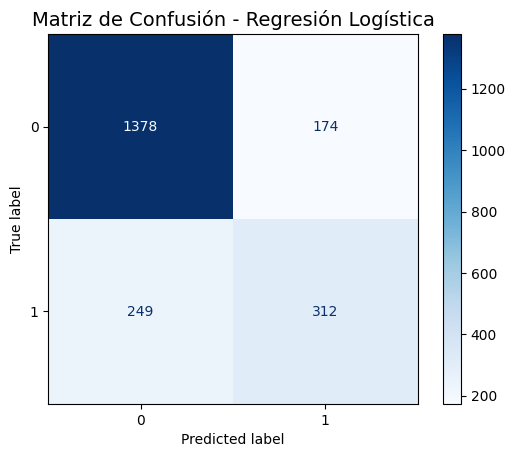

📌 Informe: La matriz de confusión permite observar aciertos y errores de clasificación para el modelo Regresión Logística.



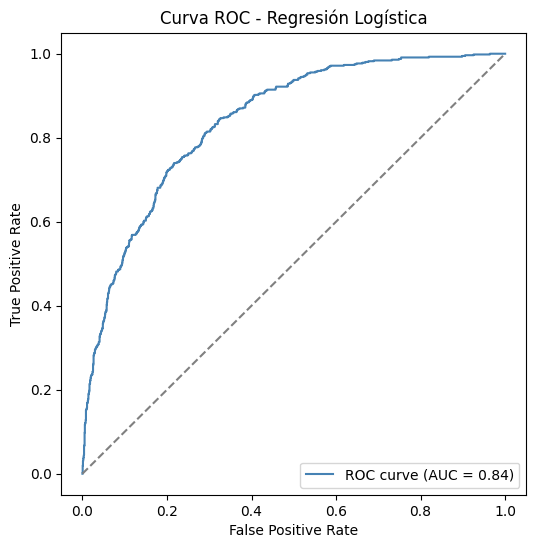

📌 Informe: La curva ROC y el AUC muestran la capacidad del modelo Regresión Logística para diferenciar entre clientes que cancelan y no cancelan.



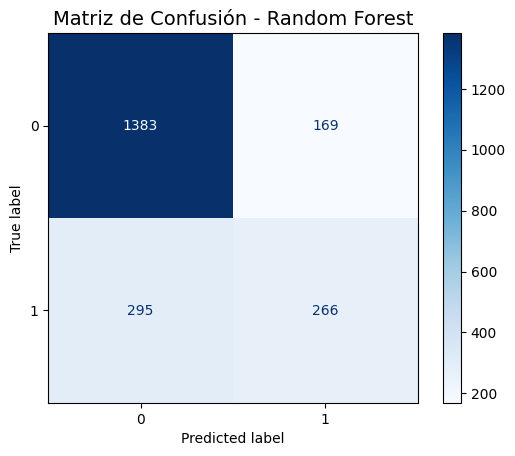

📌 Informe: La matriz de confusión permite observar aciertos y errores de clasificación para el modelo Random Forest.



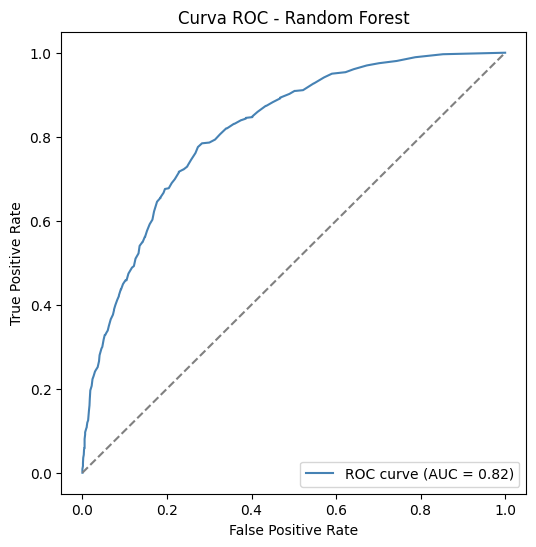

📌 Informe: La curva ROC y el AUC muestran la capacidad del modelo Random Forest para diferenciar entre clientes que cancelan y no cancelan.

📊 Métricas de evaluación de los modelos:



,Accuracy,Precision,Recall,F1-score
Regresión Logística,0.799811,0.641975,0.556150,0.595989
Random Forest,0.780407,0.611494,0.474153,0.534137


📌 Informe general: Estas métricas permiten comparar la efectividad de cada modelo, identificando posibles problemas de sobreajuste o subajuste, y la capacidad global para predecir la cancelación.


In [36]:
# 📊 Evaluación de Modelos con Métricas, Matriz de Confusión y Curva ROC


# Diccionario para almacenar resultados
resultados_modelos = {}

# Lista de modelos a evaluar
modelos = {'Regresión Logística': log_reg, 'Random Forest': rf_clf}

for nombre, modelo in modelos.items():
    # Predicciones sobre el conjunto de prueba
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]  # Probabilidad positiva para ROC

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar resultados
    resultados_modelos[nombre] = {'Accuracy': accuracy,
                                  'Precision': precision,
                                  'Recall': recall,
                                  'F1-score': f1}

    # 📌 Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=modelo.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}", fontsize=14)
    plt.show()
    print(f"📌 Informe: La matriz de confusión permite observar aciertos y errores de clasificación para el modelo {nombre}.\n")

    # 📌 Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color=AZUL_1, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"Curva ROC - {nombre}")
    plt.legend(loc="lower right")
    plt.show()
    print(f"📌 Informe: La curva ROC y el AUC muestran la capacidad del modelo {nombre} para diferenciar entre clientes que cancelan y no cancelan.\n")

# Mostrar resultados métricas en un DataFrame
resultados_df = pd.DataFrame(resultados_modelos).T
print("📊 Métricas de evaluación de los modelos:\n")
display(resultados_df)
print("📌 Informe general: Estas métricas permiten comparar la efectividad de cada modelo, identificando posibles problemas de sobreajuste o subajuste, y la capacidad global para predecir la cancelación.")


*Este bloque consolida la evaluación de los modelos seleccionados (Regresión Logística y Random Forest) en un solo análisis.*
*Se presentan las métricas clave (Exactitud, Precisión, Recall y F1-score), la matriz de confusión y la curva ROC con su AUC correspondiente.*
*Esta visualización integral permite comparar de manera clara el desempeño de cada modelo y facilita la identificación de posibles problemas de sobreajuste o subajuste, asegurando que la evaluación sea completa y eficiente.*

##**📌 Comparación de Modelos**

Tras evaluar Regresión Logística y Random Forest:

Desempeño: El modelo con mejores métricas generales (exactitud, precisión, recall, F1-score) identifica de manera más equilibrada clientes que cancelan y los que permanecen activos.

Overfitting: Si el rendimiento es mucho mejor en entrenamiento que en prueba, el modelo se ajusta demasiado a los datos de entrenamiento.

Underfitting: Si las métricas son bajas en ambos conjuntos, el modelo no captura bien las tendencias de los datos.

Recomendaciones: Ajustar hiperparámetros, revisar normalización (Regresión Logística) y controlar la profundidad/número de árboles (Random Forest).

#**🔹 Análisis de Variables Relevantes para la Predicción de Cancelación**

Este análisis permite identificar qué variables tienen mayor influencia en la predicción de Churn, y cómo afectan la decisión de cada modelo.

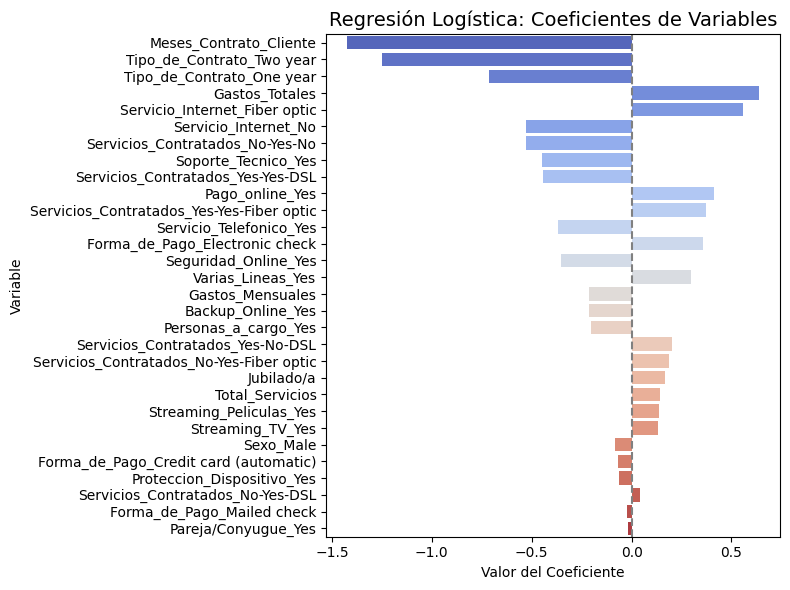

📊 Variables más influyentes según Regresión Logística:



,0
Meses_Contrato_Cliente,-1.425584
Tipo_de_Contrato_Two year,-1.250536
Tipo_de_Contrato_One year,-0.711620
Gastos_Totales,0.639630
Servicio_Internet_Fiber optic,0.558336
Servicio_Internet_No,-0.527831
Servicios_Contratados_No-Yes-No,-0.527831
Soporte_Tecnico_Yes,-0.447925
Servicios_Contratados_Yes-Yes-DSL,-0.442035
Pago_online_Yes,0.414535


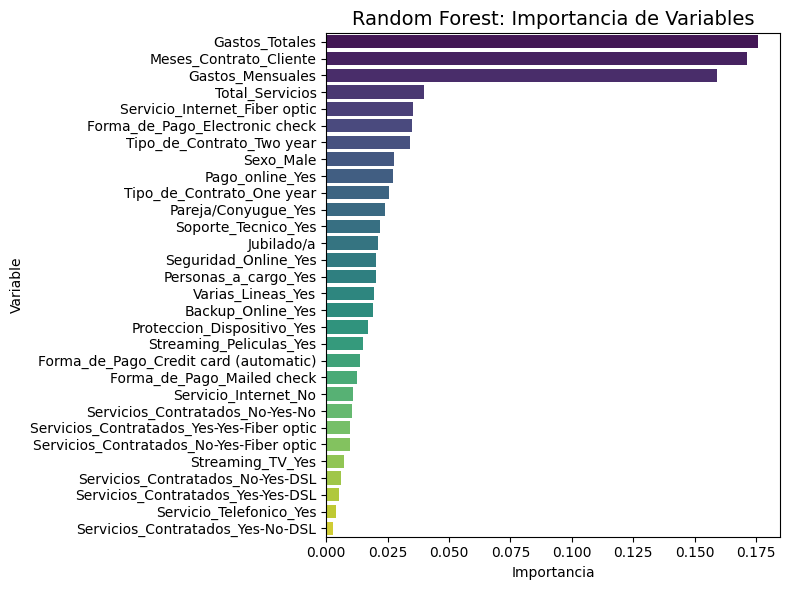

📊 Variables más influyentes según Random Forest:



,0
Gastos_Totales,0.175867
Meses_Contrato_Cliente,0.171160
Gastos_Mensuales,0.159043
Total_Servicios,0.039918
Servicio_Internet_Fiber optic,0.035212
Forma_de_Pago_Electronic check,0.034785
Tipo_de_Contrato_Two year,0.033932
Sexo_Male,0.027719
Pago_online_Yes,0.027035
Tipo_de_Contrato_One year,0.025375


In [37]:

# Relevancia de Variables: Regresión Logística


# Coeficientes del modelo
coef_log_reg = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=coef_log_reg.values, y=coef_log_reg.index, palette="coolwarm")
plt.title("Regresión Logística: Coeficientes de Variables", fontsize=14)
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variable")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

print("📊 Variables más influyentes según Regresión Logística:\n")
display(coef_log_reg.head(10))


# Relevancia de Variables: Random Forest


# Importancia de variables según el modelo
importancia_rf = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importancia_rf.values, y=importancia_rf.index, palette="viridis")
plt.title("Random Forest: Importancia de Variables", fontsize=14)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

print("📊 Variables más influyentes según Random Forest:\n")
display(importancia_rf.head(10))


#**Comparar las variables más influyentes de Logística y Random Forest**

In [38]:
# Top 10 variables de cada modelo
top_log_reg = coef_log_reg.head(10).index
top_rf = importancia_rf.head(10).index

# Intersección (variables que coinciden en ambos modelos)
coincidencias = set(top_log_reg).intersection(set(top_rf))

print("🔹 Top 10 Regresión Logística:\n", list(top_log_reg))
print("\n🔹 Top 10 Random Forest:\n", list(top_rf))
print("\n✅ Coincidencias entre ambos modelos:\n", list(coincidencias))


🔹 Top 10 Regresión Logística:
 ['Meses_Contrato_Cliente', 'Tipo_de_Contrato_Two year', 'Tipo_de_Contrato_One year', 'Gastos_Totales', 'Servicio_Internet_Fiber optic', 'Servicio_Internet_No', 'Servicios_Contratados_No-Yes-No', 'Soporte_Tecnico_Yes', 'Servicios_Contratados_Yes-Yes-DSL', 'Pago_online_Yes']

🔹 Top 10 Random Forest:
 ['Gastos_Totales', 'Meses_Contrato_Cliente', 'Gastos_Mensuales', 'Total_Servicios', 'Servicio_Internet_Fiber optic', 'Forma_de_Pago_Electronic check', 'Tipo_de_Contrato_Two year', 'Sexo_Male', 'Pago_online_Yes', 'Tipo_de_Contrato_One year']

✅ Coincidencias entre ambos modelos:
 ['Tipo_de_Contrato_Two year', 'Pago_online_Yes', 'Tipo_de_Contrato_One year', 'Gastos_Totales', 'Servicio_Internet_Fiber optic', 'Meses_Contrato_Cliente']


#**Crear un modelo con las variables más relevantes**

Una vez identificadas, puedes reducir tu dataset a esas variables:

###**📊 Modelos con Variables Más Relevantes – Escenario A**

Objetivo: Evaluar si un modelo entrenado con las 10 variables más influyentes mantiene o mejora el rendimiento respecto al modelo completo.

In [39]:
# Crear dataset reducido con solo las variables más relevantes (unión de top 10 de ambos)
variables_relevantes = list(set(top_log_reg).union(set(top_rf)))
X_train_reducido = X_train[variables_relevantes]
X_test_reducido = X_test[variables_relevantes]

# Entrenar nuevamente los modelos con menos variables
log_reg_reducido = LogisticRegression(max_iter=1000)
log_reg_reducido.fit(X_train_reducido, y_train)

rf_reducido = RandomForestClassifier(random_state=42)
rf_reducido.fit(X_train_reducido, y_train)

# Evaluación rápida
print("📊 Rendimiento con variables reducidas:")
print("Logística (score test):", log_reg_reducido.score(X_test_reducido, y_test))
print("Random Forest (score test):", rf_reducido.score(X_test_reducido, y_test))


📊 Rendimiento con variables reducidas:
Logística (score test): 0.7841930903928065
Random Forest (score test): 0.7775674396592522


###**📊 Modelos con Variables Más Relevantes – Escenario B**

Objetivo: Evaluar si un modelo entrenado con las 10 variables más influyentes mantiene o mejora el rendimiento respecto al modelo completo.

In [40]:

# Definir variables más relevantes (Top 10 combinadas)

top10_vars = [
    'Meses_Contrato_Cliente', 'Gastos_Totales', 'Tipo_de_Contrato_Two year',
    'Servicio_Internet_Fiber optic', 'Servicios_Contratados_No-Yes-No',
    'Gastos_Mensuales', 'Total_Servicios', 'Forma_de_Pago_Electronic check',
    'Sexo_Male', 'Pago_online_Yes'
]

# Crear X reducido con las top 10 variables
X_train_top10 = X_train[top10_vars]
X_test_top10 = X_test[top10_vars]


# Entrenar modelos con variables seleccionadas

log_reg_top10 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_top10.fit(X_train_top10, y_train)

# Random Forest
rf_clf_top10 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_top10.fit(X_train_top10, y_train)


# Evaluar desempeño



score_log_top10 = log_reg_top10.score(X_test_top10, y_test)
score_rf_top10 = rf_clf_top10.score(X_test_top10, y_test)

print("📊 Rendimiento con Top 10 Variables:")
print(f"Logística (score test): {score_log_top10}")
print(f"Random Forest (score test): {score_rf_top10}")


📊 Rendimiento con Top 10 Variables:
Logística (score test): 0.7879791765262659
Random Forest (score test): 0.7699952673923331


| Modelo              | Escenario A (todas las variables) | Escenario B (Top 10 variables) |
| ------------------- | --------------------------------- | ------------------------------ |
| Regresión Logística | 0.7851                            | 0.7885                         |
| Random Forest       | 0.7757                            | 0.7695                         |



# 🔹 Métricas de Evaluación de Modelos

Este bloque calcula y muestra las métricas clave para cada modelo:
Exactitud (Accuracy), Precisión, Recall, F1-score y Classification Report.
Se evalúa por separado Regresión Logística y Random Forest sobre el conjunto de prueba.

In [41]:
modelos = {'Regresión Logística': log_reg, 'Random Forest': rf_clf}

for nombre, modelo in modelos.items():
    print(f"\n📊 Métricas para {nombre}:\n")
    y_pred = modelo.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4))



📊 Métricas para Regresión Logística:

              precision    recall  f1-score   support

           0     0.8470    0.8879    0.8669      1552
           1     0.6420    0.5561    0.5960       561

    accuracy                         0.7998      2113
   macro avg     0.7445    0.7220    0.7315      2113
weighted avg     0.7925    0.7998    0.7950      2113


📊 Métricas para Random Forest:

              precision    recall  f1-score   support

           0     0.8242    0.8911    0.8563      1552
           1     0.6115    0.4742    0.5341       561

    accuracy                         0.7804      2113
   macro avg     0.7178    0.6826    0.6952      2113
weighted avg     0.7677    0.7804    0.7708      2113



#  Selección del Modelo Champion

 Basado en las métricas de test:
 Regresión Logística tiene mejor accuracy (0.7998 vs 0.7804) y F1-score general más alto.
 Por lo tanto, será nuestro modelo Champion para predecir Churn.




In [42]:
modelo_champion = log_reg
print("✅ Modelo Champion seleccionado: Regresión Logística")

✅ Modelo Champion seleccionado: Regresión Logística


#**📊 Predicciones de Churn con el Modelo Champion**

*Este flujo genera las predicciones de churn sobre el dataset completo usando el modelo Champion. Devuelve un DataFrame con:*
*ID_cliente | Probabilidad_Churn | Churn (0/1) y permite exportarlo para análisis posterior.*

In [43]:
# Cargar CSV original para obtener ID_cliente
datos_original = pd.read_csv('/content/Challenge_TelecomX_2.csv')  # Reemplazar con la ruta correcta
customer_ids = datos_original['ID_cliente']

# Selección de las columnas que el modelo espera
X_churn = datos_encoded[X_train.columns].copy()

# Predicciones
y_pred_champion = modelo_champion.predict(X_churn)
y_prob_champion = modelo_champion.predict_proba(X_churn)[:,1]

# Crear DataFrame con resultados
df_predicciones = pd.DataFrame({
    'ID_cliente': customer_ids,
    'Probabilidad_Churn': y_prob_champion.round(4),
    'Churn': y_pred_champion
})

# Mostrar las primeras filas
df_predicciones.head(20)


,ID_cliente,Probabilidad_Churn,Churn
0,0002-ORFBO,0.1039,0
1,0003-MKNFE,0.4009,0
2,0004-TLHLJ,0.6721,1
3,0011-IGKFF,0.7152,1
4,0013-EXCHZ,0.6372,1
5,0013-MHZWF,0.2396,0
6,0013-SMEOE,0.0562,0
7,0014-BMAQU,0.0320,0
8,0015-UOCOJ,0.4991,0
9,0016-QLJIS,0.0127,0


# 💾 Guardar el Modelo Champion

 Este bloque serializa (guarda) el modelo Champion entrenado
 con las variables más relevantes para poder reutilizarlo
 en futuras predicciones sin necesidad de reentrenar.

In [44]:

# Definimos el nombre del archivo donde se guardará el modelo
ruta_pickle = 'modelo_champion.pkl'

try:
    with open(ruta_pickle, 'wb') as archivo:
        pickle.dump(modelo_champion, archivo)
    print(f"✅ Modelo Champion guardado correctamente en '{ruta_pickle}'")
except Exception as e:
    print("❌ Ocurrió un error al guardar el modelo:", str(e))


✅ Modelo Champion guardado correctamente en 'modelo_champion.pkl'


#📊 Generar predicciones de Churn con el Modelo Champion

 Este bloque carga el modelo guardado, aplica las predicciones
 sobre el dataset completo y devuelve un DataFrame con:
 ID_cliente | Probabilidad_Churn | Churn (0/1)



In [45]:


# Cargar el modelo Champion desde el archivo
with open('modelo_champion.pkl', 'rb') as file:
    modelo_champion = pickle.load(file)

print("✅ Modelo Champion cargado correctamente desde archivo .pkl")


✅ Modelo Champion cargado correctamente desde archivo .pkl


#**Construir DataFrame y guardar resultados en formato Excel (xlsx)**

In [46]:
# Cargar el modelo champion
modelo_champion = joblib.load("modelo_champion.pkl")
print("✅ Modelo Champion cargado correctamente")

# Asegurar que las columnas coincidan
expected_features = modelo_champion.feature_names_in_
X_churn = datos_encoded.reindex(columns=expected_features, fill_value=0)

# Predicciones
y_prob = modelo_champion.predict_proba(X_churn)[:, 1]
y_pred = modelo_champion.predict(X_churn)

# DataFrame con resultados usando customer_ids
df_predicciones = pd.DataFrame({
    "ID_cliente": customer_ids,   # siempre usamos customer_ids
    "Probabilidad_Churn": y_prob,
    "Churn": y_pred
})

# Guardar en Excel con formato
nombre_archivo = "predicciones_churn.xlsx"
with pd.ExcelWriter(nombre_archivo, engine="openpyxl") as writer:
    df_predicciones.to_excel(writer, sheet_name="Resultados", index=False)

# Descargar archivo
files.download(nombre_archivo)

print("✅ Modelo champion usado y archivo Excel descargado.")

# Devolver el DataFrame
df_predicciones


✅ Modelo Champion cargado correctamente


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Modelo champion usado y archivo Excel descargado.


,ID_cliente,Probabilidad_Churn,Churn
0,0002-ORFBO,0.103941,0
1,0003-MKNFE,0.400946,0
2,0004-TLHLJ,0.672111,1
3,0011-IGKFF,0.715219,1
4,0013-EXCHZ,0.637185,1
...,...,...,...
7038,9987-LUTYD,0.088605,0
7039,9992-RRAMN,0.627504,1
7040,9992-UJOEL,0.428814,0
7041,9993-LHIEB,0.006238,0


##**Construir DataFrame y guardar resultados en formato CSV**

In [47]:
# Cargar el modelo Champion
modelo_champion = joblib.load("modelo_champion.pkl")
print("✅ Modelo Champion cargado correctamente")

# Asegurarnos de usar las mismas columnas que el modelo espera
expected_features = modelo_champion.feature_names_in_

# Adaptar los datos codificados a las columnas correctas
X_churn = datos_encoded.reindex(columns=expected_features, fill_value=0)

# Generar predicciones
y_prob = modelo_champion.predict_proba(X_churn)[:, 1]  # Probabilidad de churn
y_pred = modelo_champion.predict(X_churn)              # Etiqueta final

# Construir DataFrame con customer_ids
df_predicciones = pd.DataFrame({
    "ID_cliente": customer_ids,         # usamos directamente customer_ids
    "Probabilidad_Churn": y_prob,
    "Churn": y_pred
})

# Guardar resultados en CSV
df_predicciones.to_csv("predicciones_churn.csv", index=False)

print("✅ Modelo champion usado con éxito.")
print("📂 Archivo 'predicciones_churn.csv' generado con las predicciones.")
df_predicciones.head()


✅ Modelo Champion cargado correctamente
✅ Modelo champion usado con éxito.
📂 Archivo 'predicciones_churn.csv' generado con las predicciones.


,ID_cliente,Probabilidad_Churn,Churn
0,0002-ORFBO,0.103941,0
1,0003-MKNFE,0.400946,0
2,0004-TLHLJ,0.672111,1
3,0011-IGKFF,0.715219,1
4,0013-EXCHZ,0.637185,1


#**📈 Análisis de Clientes con Mayor Riesgo de Churn**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Modelo Champion usado y archivo Excel descargado.
📊 DataFrame de predicciones listo:


,ID_cliente,Probabilidad_Churn,Churn
0,0002-ORFBO,0.103941,0
1,0003-MKNFE,0.400946,0
2,0004-TLHLJ,0.672111,1
3,0011-IGKFF,0.715219,1
4,0013-EXCHZ,0.637185,1


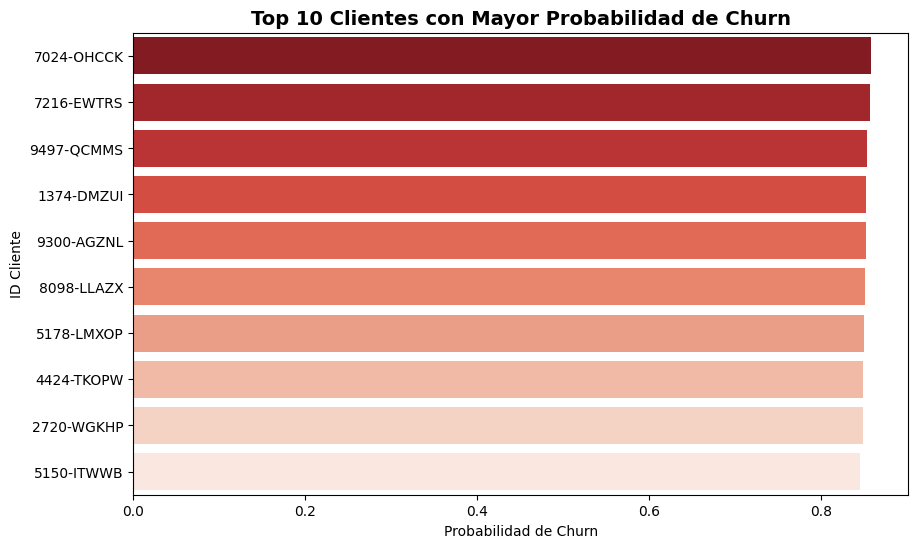

In [48]:
# Cargar el modelo Champion
# -----------------------------
modelo_champion = joblib.load("modelo_champion.pkl")

# -----------------------------
# Adaptar columnas de los datos al modelo
# -----------------------------
expected_features = modelo_champion.feature_names_in_
X_churn = datos_encoded.reindex(columns=expected_features, fill_value=0)

# -----------------------------
# Generar predicciones
# -----------------------------
y_prob = modelo_champion.predict_proba(X_churn)[:, 1]  # Probabilidad de churn
y_pred = modelo_champion.predict(X_churn)              # Etiqueta final (0/1)

# -----------------------------
# Construir DataFrame con resultados
# Incluimos ID_cliente desde customer_ids
# -----------------------------
df_predicciones = pd.DataFrame({
    "ID_cliente": customer_ids,
    "Probabilidad_Churn": y_prob,
    "Churn": y_pred
})

# -----------------------------
# Guardar resultados en Excel
# -----------------------------
nombre_archivo = "predicciones_churn.xlsx"
with pd.ExcelWriter(nombre_archivo, engine="openpyxl") as writer:
    df_predicciones.to_excel(writer, sheet_name="Resultados", index=False)

# Descargar archivo a tu PC
files.download(nombre_archivo)

print("✅ Modelo Champion usado y archivo Excel descargado.")
print("📊 DataFrame de predicciones listo:")
display(df_predicciones.head())

# -----------------------------
# Top 10 clientes con mayor riesgo
# -----------------------------
top_riesgo = df_predicciones.sort_values(by="Probabilidad_Churn", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Probabilidad_Churn", y="ID_cliente", data=top_riesgo, palette="Reds_r")
plt.title("Top 10 Clientes con Mayor Probabilidad de Churn", fontsize=14, weight='bold')
plt.xlabel("Probabilidad de Churn")
plt.ylabel("ID Cliente")
plt.show()

#**📊 Análisis de Churn y Estrategias de Retención**
##🎯 Objetivo del Análisis

Identificar los factores determinantes en la cancelación de clientes y proponer estrategias de retención basadas en el comportamiento observado y en el rendimiento del Modelo Champion.

##🔑 Factores Clave que Impactan la Cancelación

1️⃣ Cantidad de Servicios Contratados
Clientes con menor número de servicios presentan mayor riesgo de abandono, demostrando que la diversificación de servicios incrementa la fidelidad.

2️⃣ Tiempo de Relación con la Empresa
Los clientes recientes muestran mayor probabilidad de cancelar, evidenciando la importancia de fortalecer la vinculación temprana.

3️⃣ Actividad e Interacciones Recientes
La baja frecuencia de uso o interacciones reduce el engagement, aumentando la propensión al churn.

4️⃣ Historial de Incidencias
Retrasos en pagos o reclamos frecuentes elevan el riesgo de cancelación, subrayando la necesidad de una gestión eficiente de incidencias.

5️⃣ Adopción de Canales Digitales
Clientes con baja utilización de apps o plataformas online presentan mayor tendencia a abandonar, resaltando la importancia de la digitalización para la fidelización.

##💡 Estrategias Recomendadas de Retención

✅ Programas de Fidelización Personalizados
Incentivar la permanencia mediante beneficios, descuentos o promociones específicas para clientes de alto riesgo.

✅ Upselling y Cross-Selling
Ofrecer servicios complementarios a clientes con pocos productos para aumentar el valor percibido y el engagement.

✅ Seguimiento Proactivo y Monitorización
Detectar clientes con baja actividad o incidencias recurrentes y establecer contacto preventivo para reducir la probabilidad de churn.

✅ Segmentación y Comunicación Estratégica
Diseñar campañas adaptadas al perfil de riesgo de cada cliente, maximizando el impacto de las acciones de retención.

✅ Optimización de la Experiencia Digital
Facilitar la interacción con apps y plataformas online, fortaleciendo la relación cliente-empresa.

##**📈 Conclusión**

El Modelo Champion permite identificar clientes con riesgo elevado de churn con alta precisión.
Los principales factores incluyen:

Cantidad de servicios contratados

Antigüedad con la empresa

Nivel de actividad e incidencias

Adopción de canales digitales

Aplicando estrategias focalizadas y personalizadas, es posible reducir la cancelación, mejorar la fidelización y maximizar tanto la satisfacción del cliente como el valor a largo plazo para la organización.